# __Ultrasonic Flowmeter Diagnostics Data Set__

## __0. Overview__


The dataset was given without much explanation on each features. To better understand the data that was given, we went to research for more information regarding each individual feature.

The following are features that may be used to predict our target variable (health state of pipeline):

1. Profile factor - relationship between the inner and outer paths of a meter also referred to as flatness ratio. It is an indication of the shape of the flow profile passing through the meter. Changes can indicate dirt build up, presence of liquids or blockages upstream of the meter/ ratio of individual path velocities is used to quantify the shape of profile (B+C)/(A+D) [flow velocity]
2. Symmetry - a relationship between the paths in the top of the meter compared to the paths in the bottom half of the meter. Asymmetry can also indicate blockages or liquids. Installation effects often are
identified here as flow out of elbows or tees can present as different velocities in the top compared to the bottom of the meter
3. Crossflow - a relationship between the paths crossing at different angles through the meter body (indicates roughly horizontal symmetry compared to Symmetry which indicates vertical symmetry)
4. Swirl angle - a comparison of individual path velocities to determine rotational stability of the flow
5. Flow velocity in each of the four paths
6. Average flow velocity in all four paths
7. Speed of sound in each of the four paths
8. Average speed of sound in all four paths
9. Signal strength at both ends of each of the four paths
10. Turbulence in each of the four paths - an indication of flow stability determined by the deviation of individual velocity measurements over time (also referred to as standard deviation)
11. Meter performance
12. Signal quality at both ends of each of the four paths
13. Gain at both ends of each of the four paths
14. Transit time at both ends of each of the four paths
15. Class attribute or health state of meter:
    <ul>
        <li>1: Healthy </li>
        <li>2: Gas injection </li>
        <li>3: Installation effects </li>
        <li>4: Waxing </li>
    </ul>

## __1. Load Libraries and read data__

### __1.1. Import required libraries__

In [10]:
#!pip install missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas.plotting import scatter_matrix
from scipy import stats

### __1.2. Read data__

In [11]:
colNameB = [ 'ProfileFactor', 'Symmetry', 'Crossflow', 'SwirlAngle',
             'FlowVelocityP1', 'FlowVelocityP2', 'FlowVelocityP3', 'FlowVelocityP4','AvgFlowVelocity', 
             'SpeedOfSoundP1', 'SpeedOfSoundP2','SpeedOfSoundP3', 'SpeedOfSoundP4', 'AvgSpeedOfSound',
             'SignalStrP1_1', 'SignalStrP1_2', 'SignalStrP2_1', 'SignalStrP2_2', 'SignalStrP3_1', 'SignalStrP3_2', 'SignalStrP4_1', 'SignalStrP4_2',
             'TurbulenceP1', 'TurbulenceP2', 'TurbulenceP3', 'TurbulenceP4', "MeterPerformance",
             'SignalQltP1_1', 'SignalQltP1_2', 'SignalQltP2_1', 'SignalQltP2_2', 'SignalQltP3_1', 'SignalQltP3_2', 'SignalQltP4_1', 'SignalQltP4_2',
             'GainP1_1', 'GainP1_2', 'GainP2_1', 'GainP2_2', 'GainP3_1', 'GainP3_2', 'GainP4_1', 'GainP4_2', 
             'TransmitTimeP1_1', 'TransmitTimeP1_2', 'TransmitTimeP2_1', 'TransmitTimeP2_2', 'TransmitTimeP3_1', 'TransmitTimeP3_2', 'TransmitTimeP4_1', 'TransmitTimeP4_2', 
             'HealthState'
            ]

colNameCD = [ 'ProfileFactor', 'Symmetry', 'Crossflow',
              'FlowVelocityP1', 'FlowVelocityP2', 'FlowVelocityP3', 'FlowVelocityP4', 
              'SpeedOfSoundP1', 'SpeedOfSoundP2','SpeedOfSoundP3', 'SpeedOfSoundP4',
              'SignalStrP1_1', 'SignalStrP1_2', 'SignalStrP2_1', 'SignalStrP2_2', 'SignalStrP3_1', 'SignalStrP3_2', 'SignalStrP4_1', 'SignalStrP4_2',
              'SignalQltP1_1', 'SignalQltP1_2', 'SignalQltP2_1', 'SignalQltP2_2', 'SignalQltP3_1', 'SignalQltP3_2', 'SignalQltP4_1', 'SignalQltP4_2',
              'GainP1_1', 'GainP1_2', 'GainP2_1', 'GainP2_2', 'GainP3_1', 'GainP3_2', 'GainP4_1', 'GainP4_2', 
              'TransmitTimeP1_1', 'TransmitTimeP1_2', 'TransmitTimeP2_1', 'TransmitTimeP2_2', 'TransmitTimeP3_1', 'TransmitTimeP3_2', 'TransmitTimeP4_1', 'TransmitTimeP4_2', 
              'HealthState'
            ]

# meter B
df_B = pd.read_csv('Meter B.csv', header=None, names=colNameB)

# meter C
df_C = pd.read_csv('Meter C.csv', header=None, names=colNameCD)

# meter D
df_D = pd.read_csv('Meter D.csv', header=None, names=colNameCD)


### __1.3. Missing data__


<AxesSubplot:>

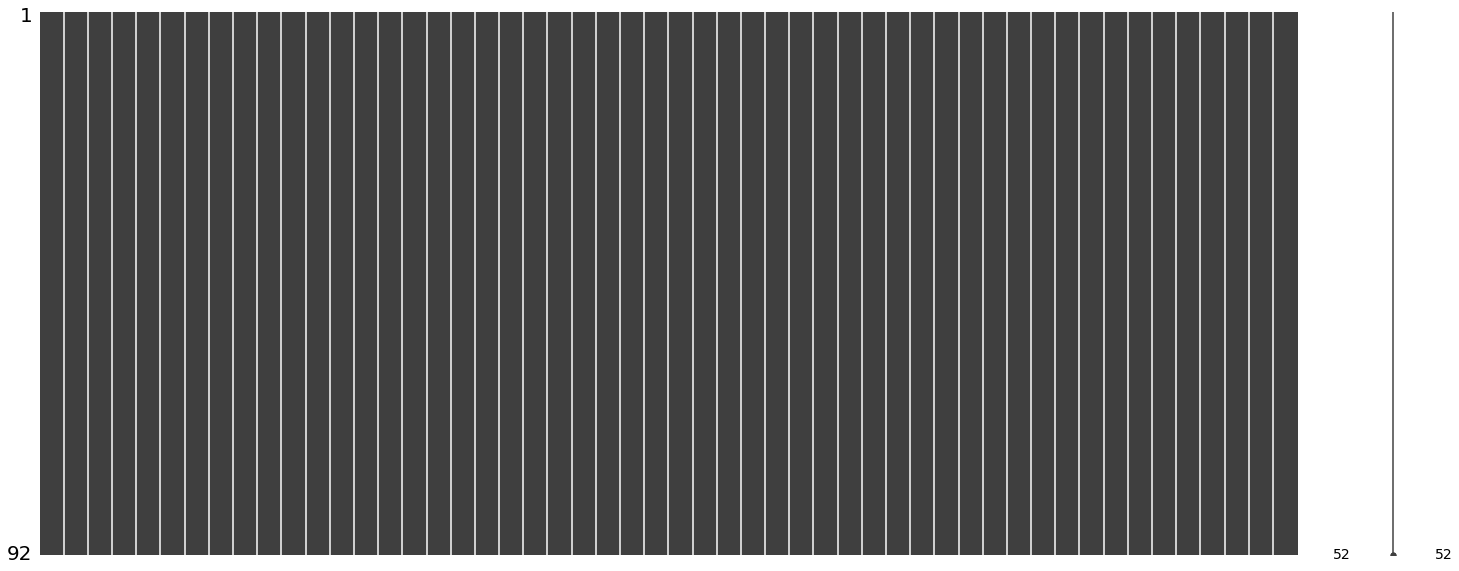

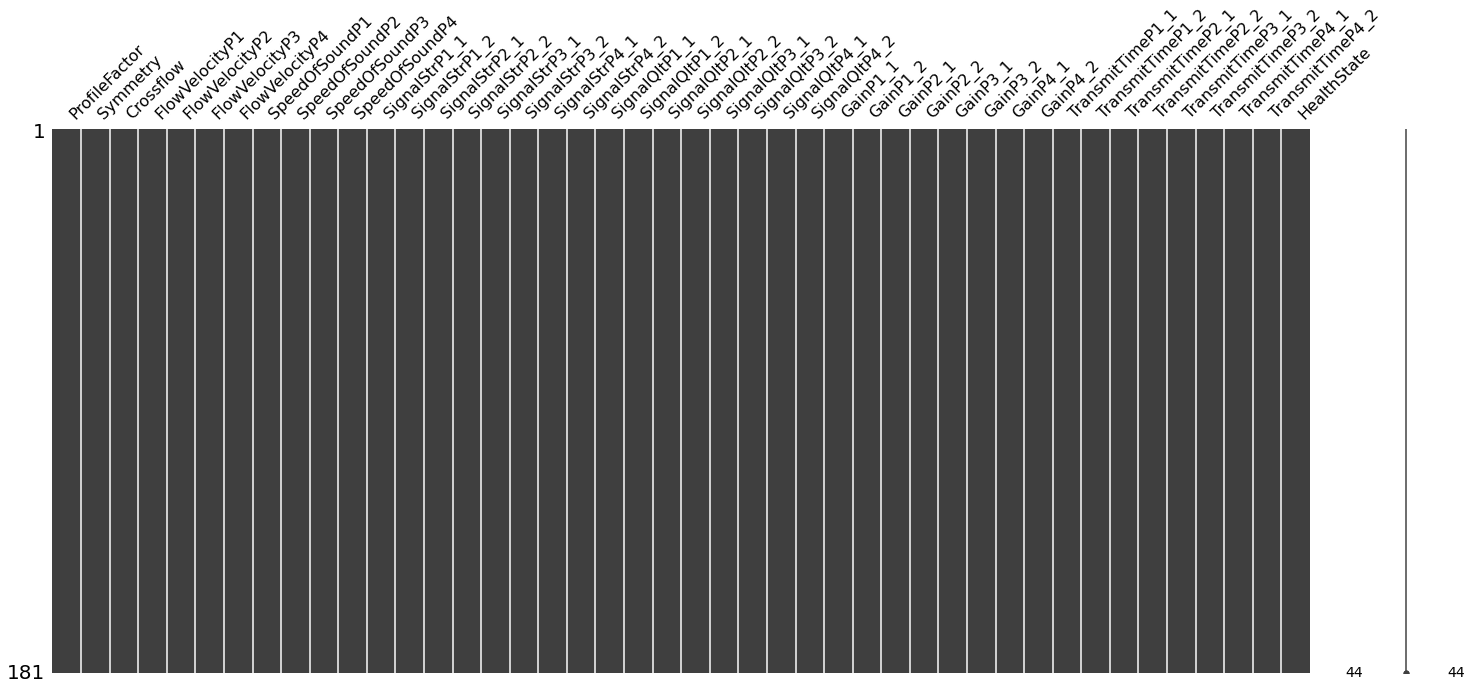

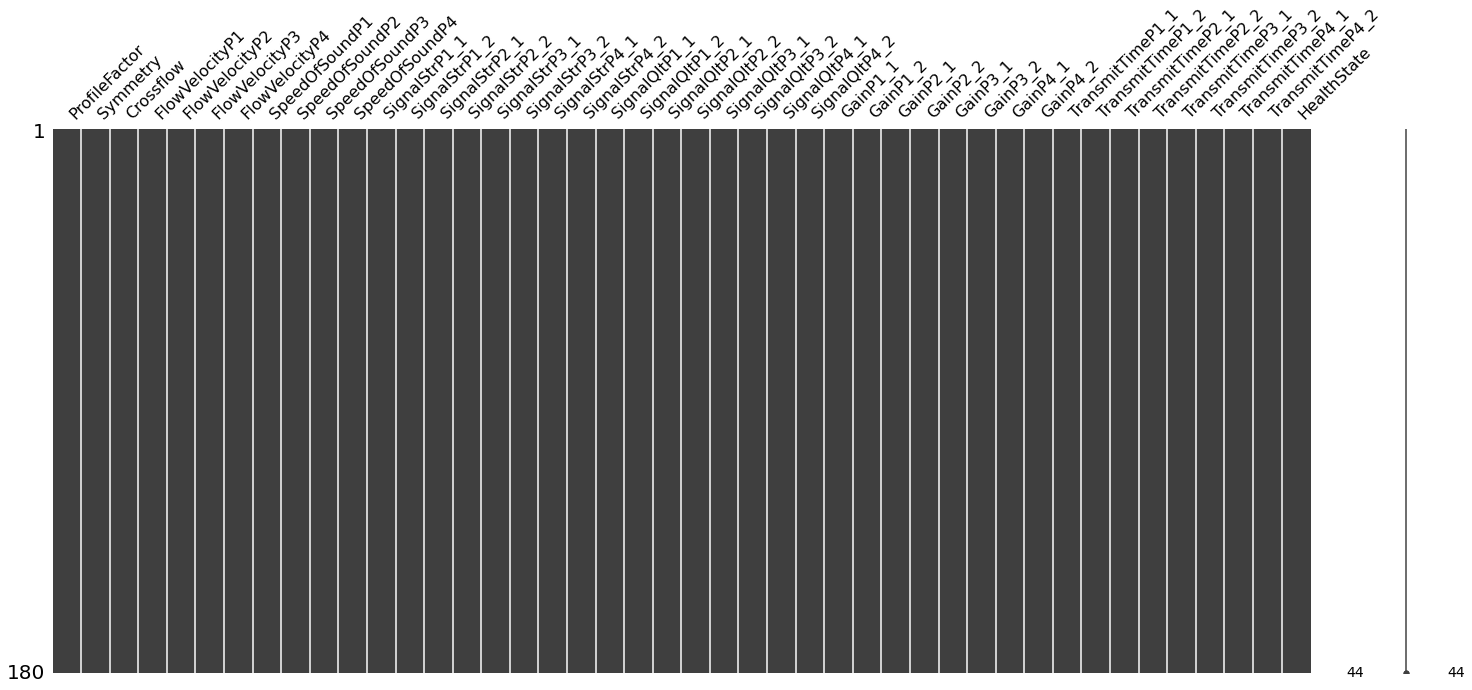

In [12]:
# meter B
msno.matrix(df_B)

# meter C
msno.matrix(df_C)

# meter D
msno.matrix(df_D)

### __1.4. Duplicated data__

In [13]:
# meter B
dups = df_B.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

# meter C
dups = df_C.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

# meter D
dups = df_D.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0
Number of duplicate rows = 0
Number of duplicate rows = 0


Observation:
There is no duplicated data

## __2. Exploratory Data analysis (EDA)__

### __2.X. General information__

In [14]:
df_D.head()

,ProfileFactor,Symmetry,Crossflow,FlowVelocityP1,FlowVelocityP2,FlowVelocityP3,FlowVelocityP4,SpeedOfSoundP1,SpeedOfSoundP2,SpeedOfSoundP3,...,GainP4_2,TransmitTimeP1_1,TransmitTimeP1_2,TransmitTimeP2_1,TransmitTimeP2_2,TransmitTimeP3_1,TransmitTimeP3_2,TransmitTimeP4_1,TransmitTimeP4_2,HealthState
0,1.104706,1.004679,0.994783,2.345833,2.604444,2.580000,2.347222,1485.805556,1485.930556,1485.941667,...,-0.7,124.150000,123.911944,151.615833,151.275000,151.559444,151.221111,124.253611,124.017778,1
1,1.089401,0.997778,0.998012,3.399444,3.711111,3.711944,3.414444,1486.163889,1486.302778,1486.302778,...,-0.7,124.171944,123.831667,151.652222,151.164444,151.595278,151.113333,124.274167,123.937778,1
2,1.079671,1.006056,0.999027,3.438056,3.714722,3.689722,3.420000,1486.322222,1486.452778,1486.455556,...,-0.7,124.160000,123.818056,151.636111,151.150833,151.580000,151.096944,124.260833,123.923611,1
3,1.090834,1.013194,0.994911,3.399444,3.725000,3.660556,3.371111,1486.455556,1486.575000,1486.583333,...,-0.7,124.144722,123.808611,151.622500,151.139167,151.564167,151.084167,124.250833,123.913056,1
4,1.093816,1.009716,1.003622,3.398889,3.702778,3.681389,3.351944,1486.600000,1486.725000,1486.730556,...,-0.7,124.134444,123.797500,151.607500,151.122778,151.550278,151.068889,124.236111,123.903056,1


In [15]:
df_D.describe()

,ProfileFactor,Symmetry,Crossflow,FlowVelocityP1,FlowVelocityP2,FlowVelocityP3,FlowVelocityP4,SpeedOfSoundP1,SpeedOfSoundP2,SpeedOfSoundP3,...,GainP4_2,TransmitTimeP1_1,TransmitTimeP1_2,TransmitTimeP2_1,TransmitTimeP2_2,TransmitTimeP3_1,TransmitTimeP3_2,TransmitTimeP4_1,TransmitTimeP4_2,HealthState
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.411731,1.166684,1.188470,4.475259,4.890867,4.910373,3.266045,1487.287238,1484.539830,1485.889306,...,12.504306,124.020073,123.821264,151.796256,151.411492,151.681565,151.092505,122.045856,120.976574,2.588889
std,0.904196,3.189220,0.675639,2.183965,2.357263,2.229163,2.944863,10.828438,10.910521,7.462522,...,20.331656,1.403897,1.036510,1.677263,1.279263,0.872729,0.895633,4.713213,6.406887,1.176060
min,-2.474166,-37.780488,-2.275649,-2.617222,-2.124444,-0.190000,-3.028611,1441.675000,1413.877778,1458.702778,...,-1.000000,111.804444,121.059167,140.902222,149.773889,147.680000,146.737778,99.679444,97.809167,1.000000
25%,1.085364,0.999759,0.992503,3.377778,3.703611,3.660764,0.373194,1483.476389,1483.579861,1483.596528,...,-0.700000,124.143889,123.719792,151.632917,151.021042,151.587639,150.962153,118.698194,118.818958,1.000000
50%,1.093996,1.005958,0.998655,4.859306,5.604306,5.609861,3.398194,1484.890278,1484.918056,1484.847222,...,-0.700000,124.374306,123.858194,151.930833,151.189444,151.880000,151.128333,124.364583,123.911667,3.000000
75%,1.207706,1.020066,1.007719,6.250347,6.815278,6.771667,6.194306,1486.661805,1486.586806,1486.588194,...,44.200000,124.487361,124.031181,152.064097,151.415278,152.012431,151.350903,124.567153,124.057361,4.000000
max,5.911308,11.191656,3.314103,8.041111,8.667222,8.622500,7.941944,1552.372222,1523.722222,1512.719444,...,45.100000,128.273056,127.807500,161.174167,160.737222,154.210833,154.225278,124.886111,124.396389,4.000000


### __2.X. Target class distribution__

In [16]:
X = df_D.drop('HealthState', axis=1)
Y = df_D['HealthState']

# for plotting graphs
label = {1:"Healthy", 2:"Gas injection", 3:"Installation Effects", 4:"Waxing"}
Y_map = df_D['HealthState'].map(label)

# dataframe with target class mapped
df_D_map = pd.concat([X, Y_map], axis=1)

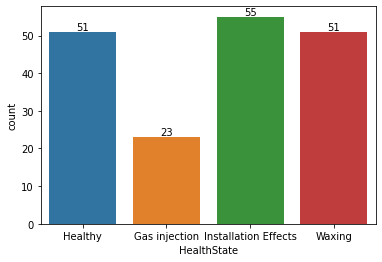

In [17]:
def plotTargetCount(Y, label=""):
    ax = sns.countplot(x=Y, label="Count")
    ax.bar_label(ax.containers[0])
    # ax.set_xticklabels(['Healthy', 'Gas injection', 'Installation Effects', 'Waxing'], fontsize=8)
    ax.set_title(label)
    plt.show()

plotTargetCount(Y_map)

Observation: 
The classes are imbalanced, might need to look into.

### __2.X. Features distribution__

### __2.X. Correlation Matrix__

In [18]:
def plotCorrMatHeatMap(df):
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Compute correlation matrix
    corr = df.corr()
    # Set up the matplotlib figure
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # f, ax = plt.subplots(figsize=(df.shape[1], df.shape[1]))   
    plt.figure(figsize=(df.shape[1], df.shape[1]))
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr(), cmap=cmap, center=0, annot = True, vmin =-1, vmax=1,
                square=True, linewidths=.5, cbar_kws={"shrink": .75})
    plt.show()

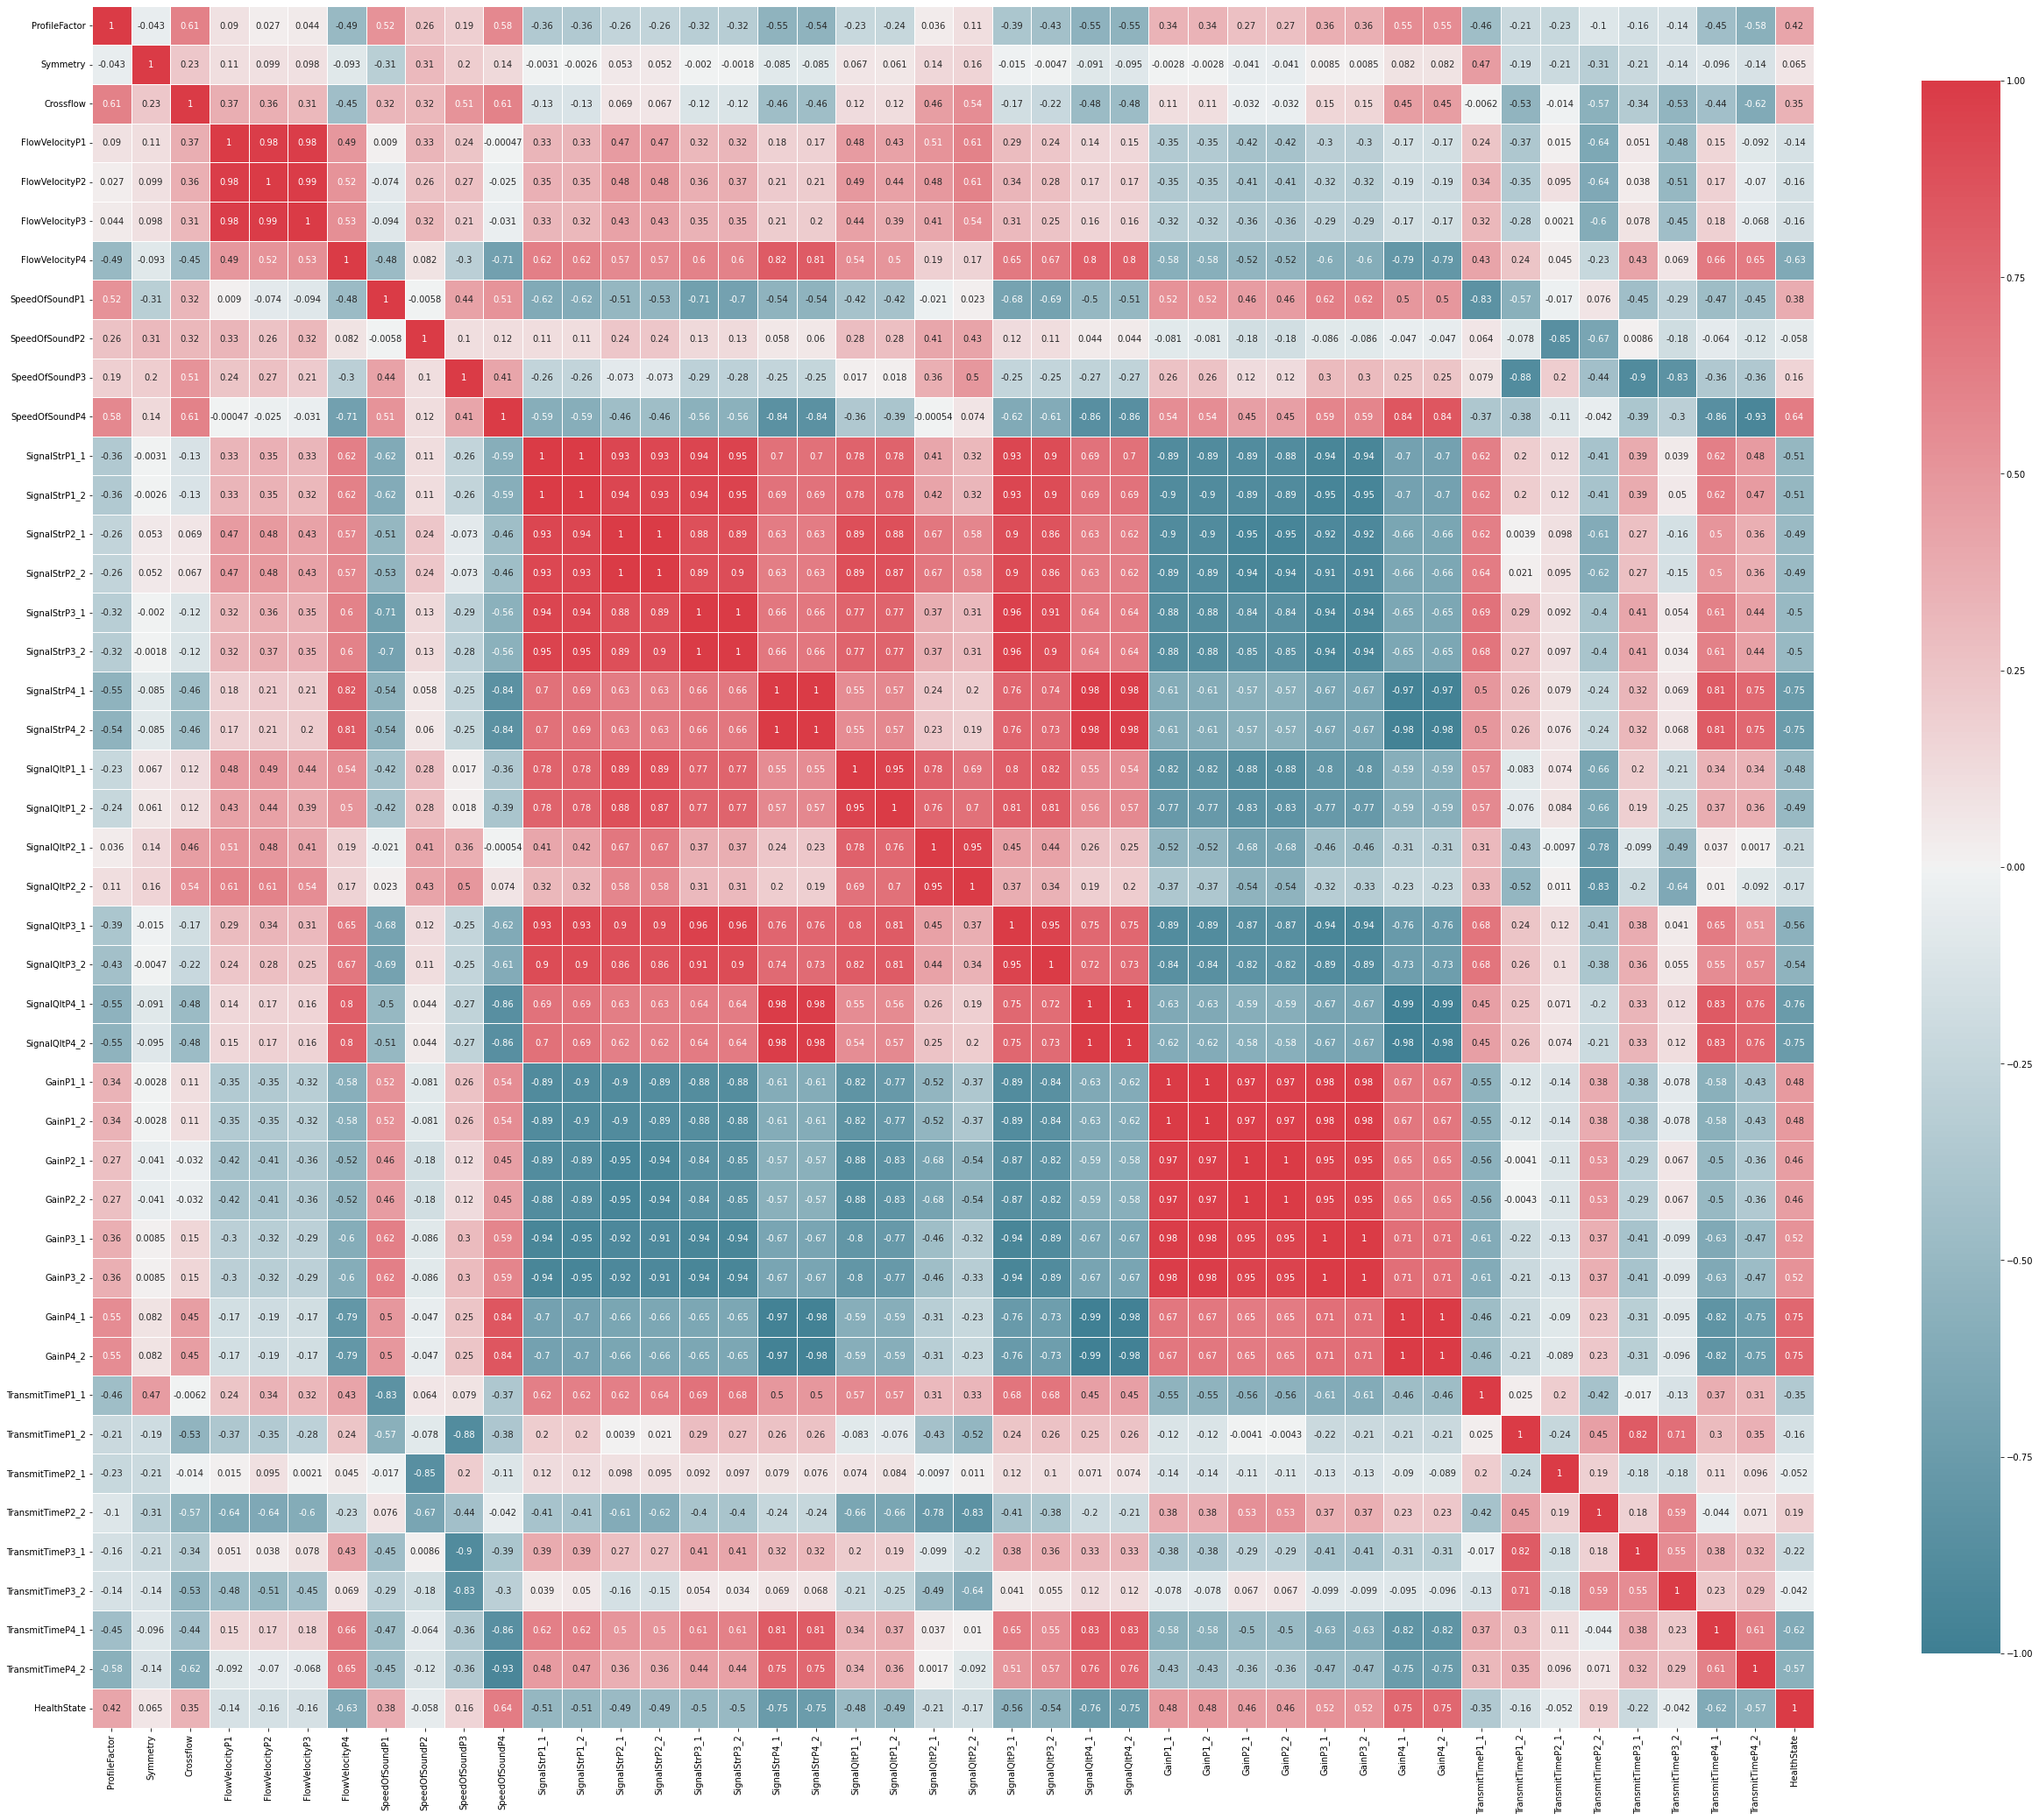

In [19]:
plotCorrMatHeatMap(df_D)

In [20]:
# sns.pairplot(df_D[['ProfileFactor','Crossflow', 'HealthState']], hue="HealthState")
# plt.gcf().set_size_inches(12, 6) #set size of pairplot
# plt.show()

# Plot
#Gas injection', 'Healthy', 'Waxing', 'Installation Effects'
# def plotScatter(feature_1, feature_2, df):
#     plt.figure(figsize=(10,7))
#     sns.scatterplot(x=df[f'{feature_1}'], y=df[f'{feature_2}'], s=70, hue=df['HealthState'].map(label), palette=['blue', 'orange', 'green', 'red'])
#     plt.title(f'{feature_1} vs {feature_2}')
#     plt.xlabel(f'{feature_1}')
#     plt.ylabel(f'{feature_2}')
#     plt.show()

palette ={ 'Healthy': 'blue', 'Gas injection': 'orange', 'Installation Effects':'green', 'Waxing':'red'}
edgecolor = 'grey'

def plotScatter(feature_1, feature_2, df):
    fig = plt.figure(figsize=(10,7))

    # plt.subplot(221)
    ax1 = sns.scatterplot(x = df[f'{feature_1}'], y=df[f'{feature_2}'], hue = df['HealthState'].map(label),
                        palette = palette, edgecolor=edgecolor)
    plt.title(f'{feature_1} vs {feature_2}')
    plt.show()

### __2.X. Positive Correlated features__

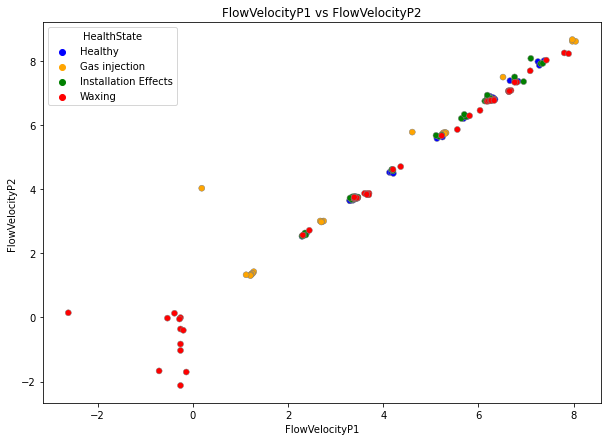

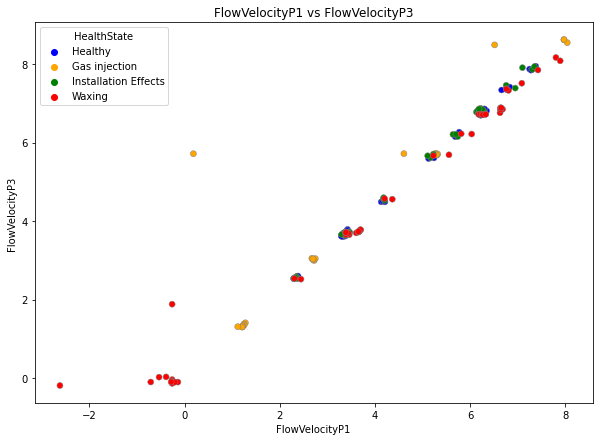

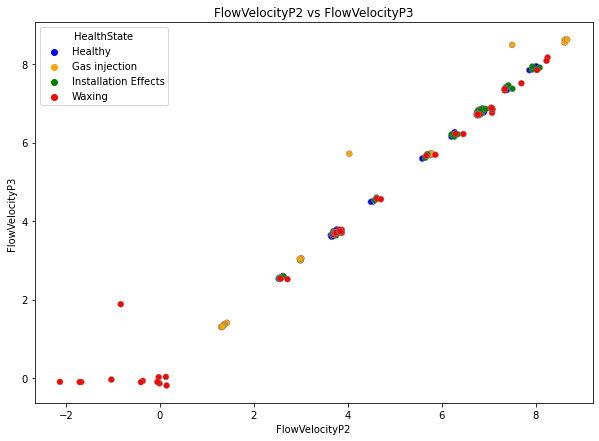

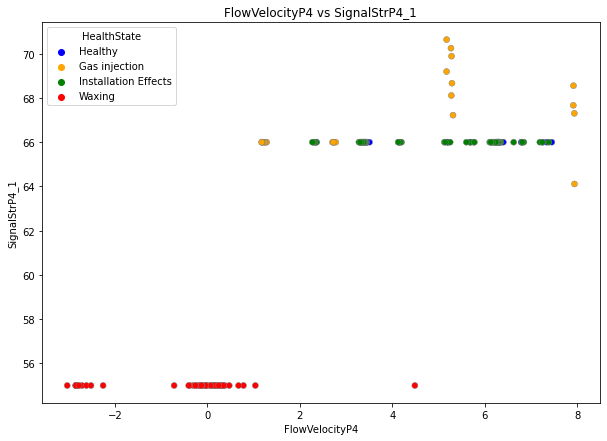

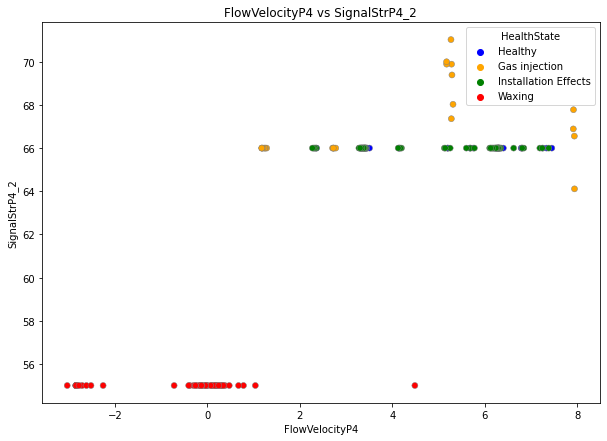

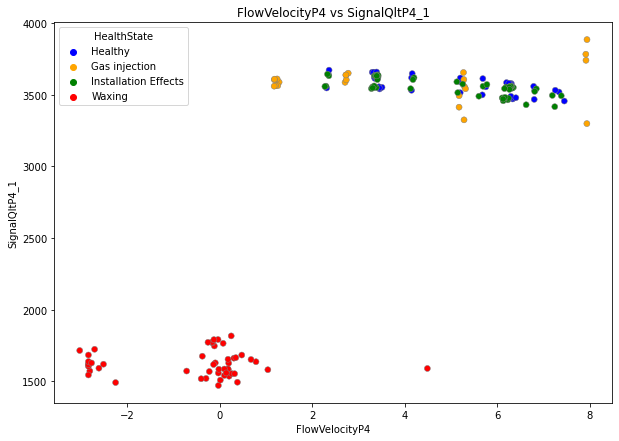

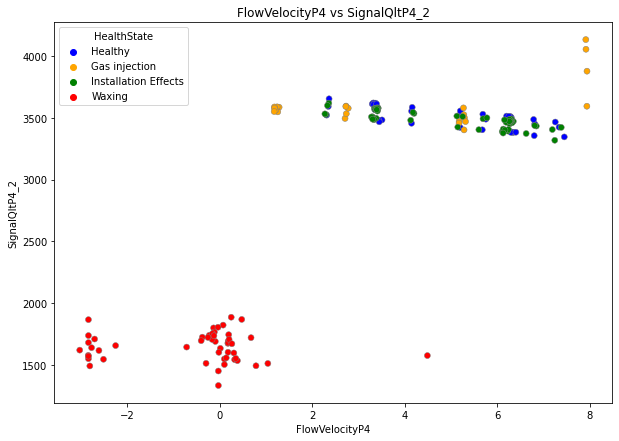

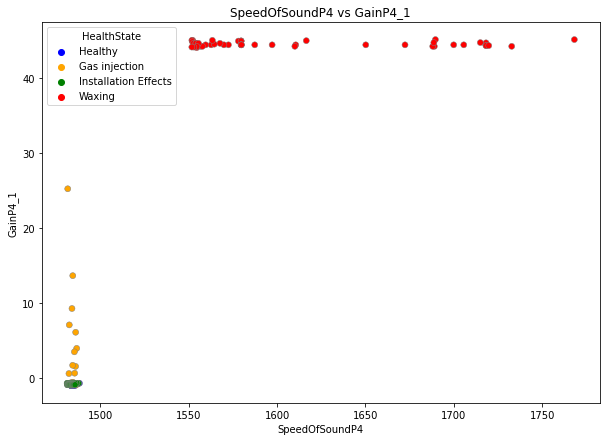

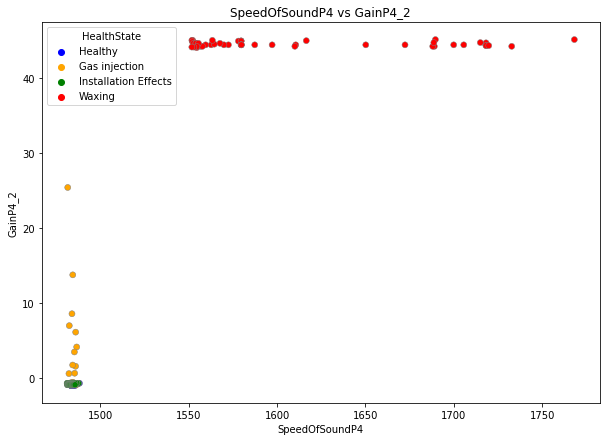

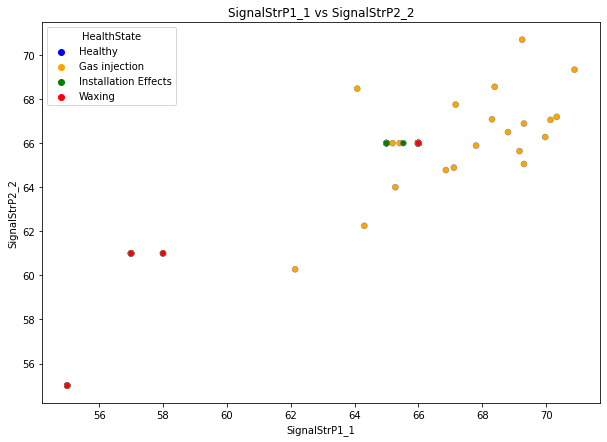

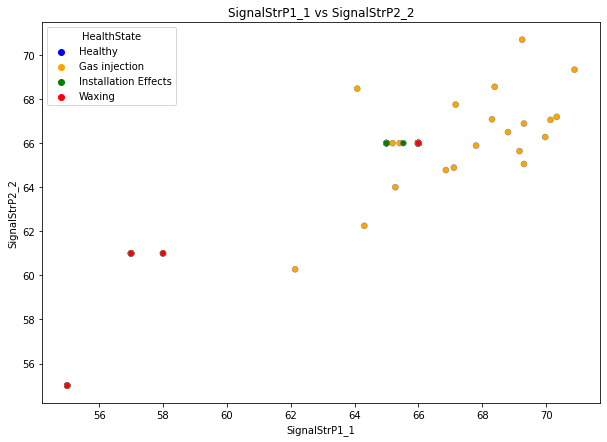

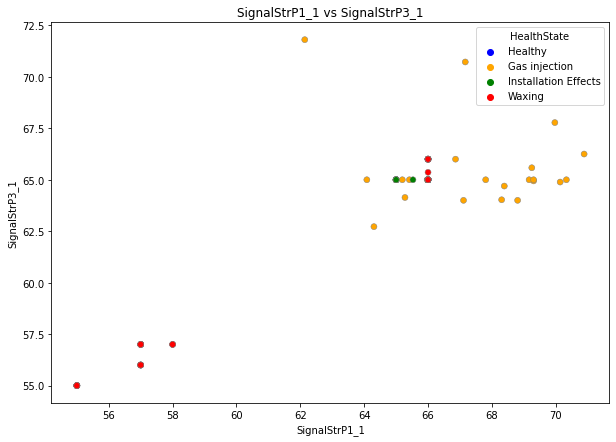

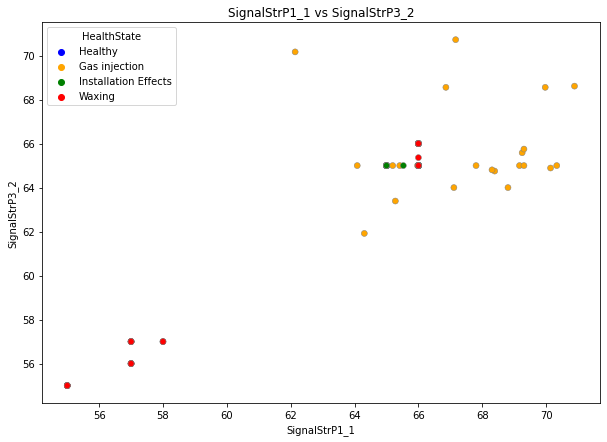

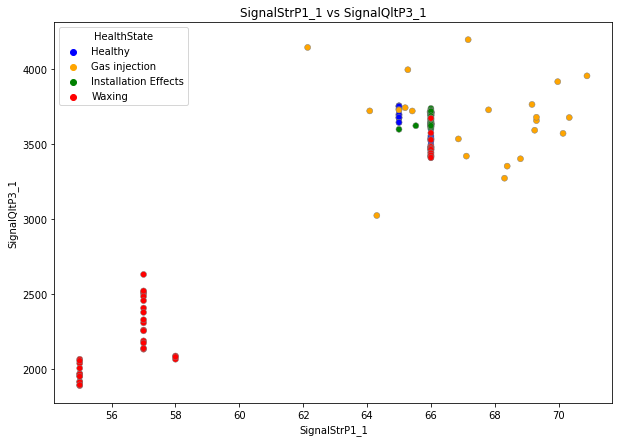

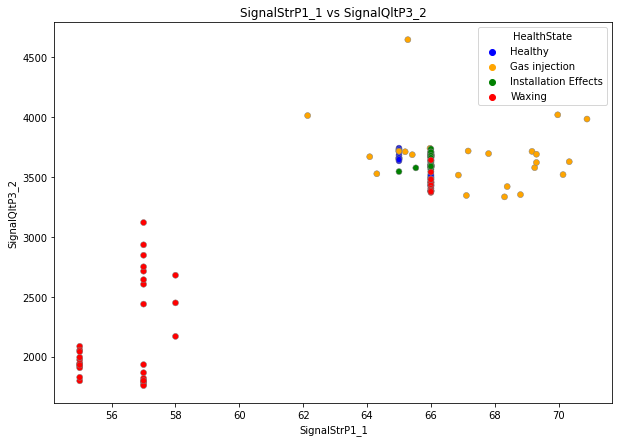

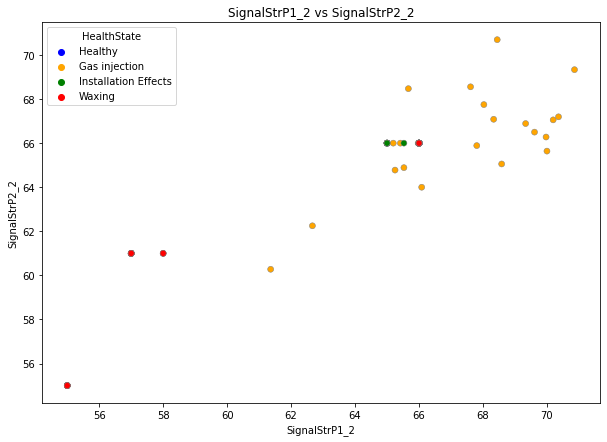

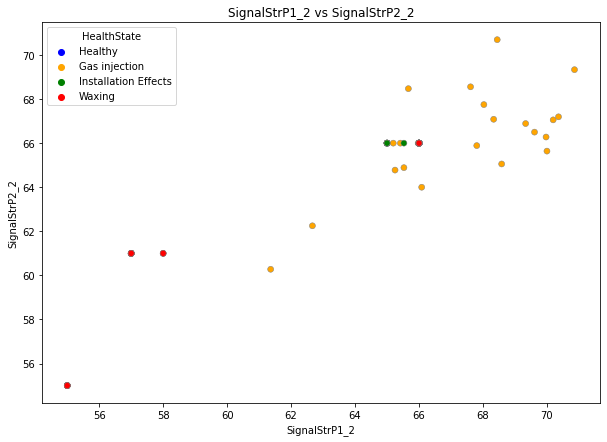

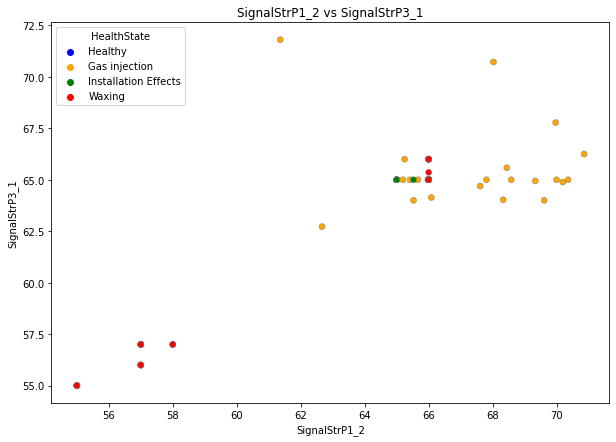

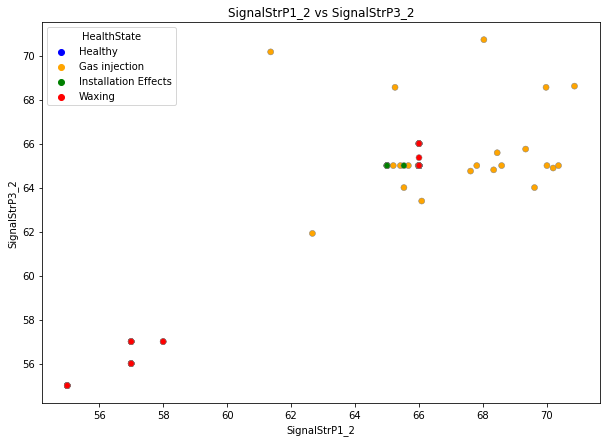

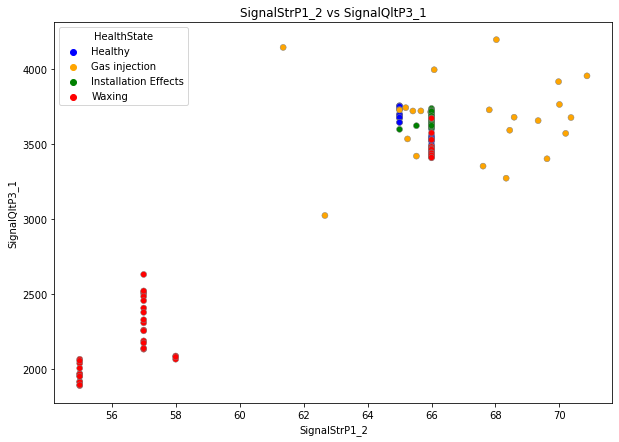

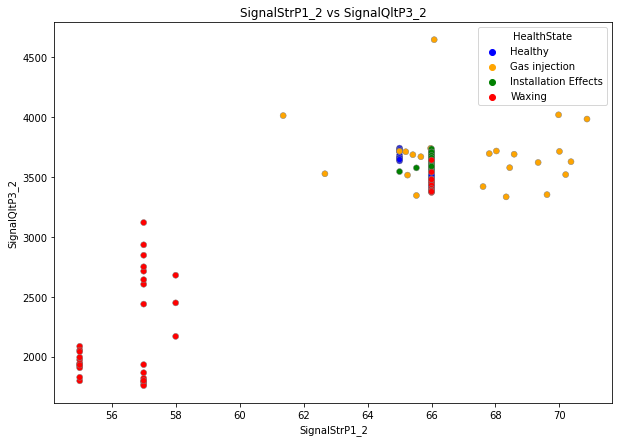

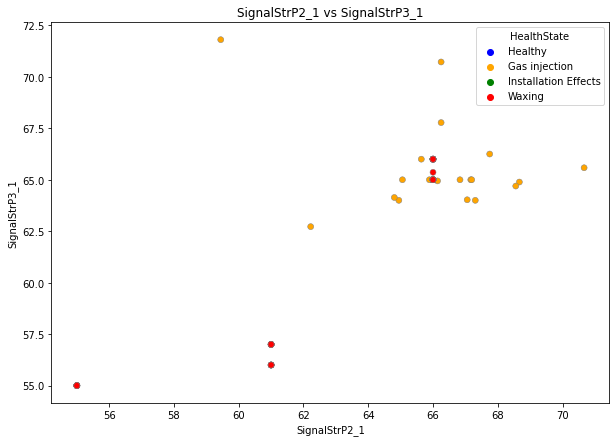

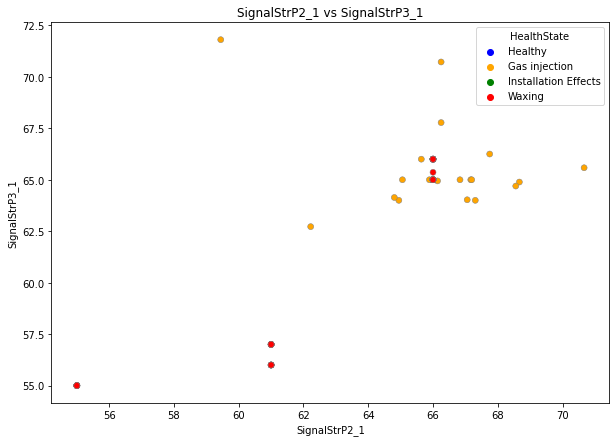

In [80]:
plotScatter('FlowVelocityP1','FlowVelocityP2', df_D)
plotScatter('FlowVelocityP1','FlowVelocityP3', df_D)

plotScatter('FlowVelocityP2','FlowVelocityP3', df_D)

plotScatter('FlowVelocityP4','SignalStrP4_1', df_D)
plotScatter('FlowVelocityP4','SignalStrP4_2', df_D)
plotScatter('FlowVelocityP4','SignalQltP4_1', df_D)
plotScatter('FlowVelocityP4','SignalQltP4_2', df_D)

plotScatter('SpeedOfSoundP4','GainP4_1', df_D) #0.84
plotScatter('SpeedOfSoundP4','GainP4_2', df_D) #0.84

plotScatter('SignalStrP1_1','SignalStrP2_2', df_D) #0.93
plotScatter('SignalStrP1_1','SignalStrP2_2', df_D) #0.93
plotScatter('SignalStrP1_1','SignalStrP3_1', df_D) #0.94
plotScatter('SignalStrP1_1','SignalStrP3_2', df_D) #0.95
plotScatter('SignalStrP1_1','SignalQltP3_1', df_D) #0.93
plotScatter('SignalStrP1_1','SignalQltP3_2', df_D) #0.9

plotScatter('SignalStrP1_2','SignalStrP2_2', df_D) #0.93
plotScatter('SignalStrP1_2','SignalStrP2_2', df_D) #0.93
plotScatter('SignalStrP1_2','SignalStrP3_1', df_D) #0.94
plotScatter('SignalStrP1_2','SignalStrP3_2', df_D) #0.95
plotScatter('SignalStrP1_2','SignalQltP3_1', df_D) #0.93
plotScatter('SignalStrP1_2','SignalQltP3_2', df_D) #0.9

plotScatter('SignalStrP2_1','SignalStrP3_1', df_D) #0.88
plotScatter('SignalStrP2_1','SignalStrP3_1', df_D) #0.89
plotScatter('SignalStrP2_1','SignalQltP1_1', df_D) #0.89
plotScatter('SignalStrP2_1','SignalQltP1_2', df_D) #0.88
plotScatter('SignalStrP2_1','SignalQltP3_1', df_D) #0.9
plotScatter('SignalStrP2_1','SignalQltP3_2', df_D) #0.86

plotScatter('SignalStrP2_2','SignalStrP3_1', df_D) #0.89
plotScatter('SignalStrP2_2','SignalStrP3_1', df_D) #0.9
plotScatter('SignalStrP2_2','SignalQltP1_1', df_D) #0.89
plotScatter('SignalStrP2_2','SignalQltP1_2', df_D) #0.87
plotScatter('SignalStrP2_2','SignalQltP3_1', df_D) #0.9
plotScatter('SignalStrP2_2','SignalQltP3_2', df_D) #0.86

plotScatter('SignalStrP3_1','SignalQltP1_1', df_D) #0.96
plotScatter('SignalStrP3_1','SignalQltP1_2', df_D) #0.91

plotScatter('SignalStrP3_2','SignalQltP1_1', df_D) #0.96
plotScatter('SignalStrP3_2','SignalQltP1_2', df_D) #0.9

plotScatter('SignalStrP4_1','FlowVelocityP4', df_D) #0.82
plotScatter('SignalStrP4_1','SignalQltP4_1', df_D) #0.98
plotScatter('SignalStrP4_1','SignalQltP4_2', df_D) #0.98
plotScatter('SignalStrP4_1','TransmitTimeP4_1', df_D) #0.81

plotScatter('SignalStrP4_2','FlowVelocityP4', df_D) #0.81
plotScatter('SignalStrP4_2','SignalQltP4_1', df_D) #0.98
plotScatter('SignalStrP4_2','SignalQltP4_2', df_D) #0.98
plotScatter('SignalStrP4_2','TransmitTimeP4_1', df_D) #0.81

plotScatter('SignalQltP1_1','SignalQltP1_2', df_D) #0.95
plotScatter('SignalQltP1_1','SignalQltP3_1', df_D) #0.8
plotScatter('SignalQltP1_1','SignalQltP3_2', df_D) #0.82

plotScatter('SignalQltP1_2','SignalQltP3_1', df_D) #0.81
plotScatter('SignalQltP1_2','SignalQltP3_2', df_D) #0.81

plotScatter('SignalQltP2_1','SignalQltP2_2', df_D) #0.95

### __2.X. Negative Correlated features__

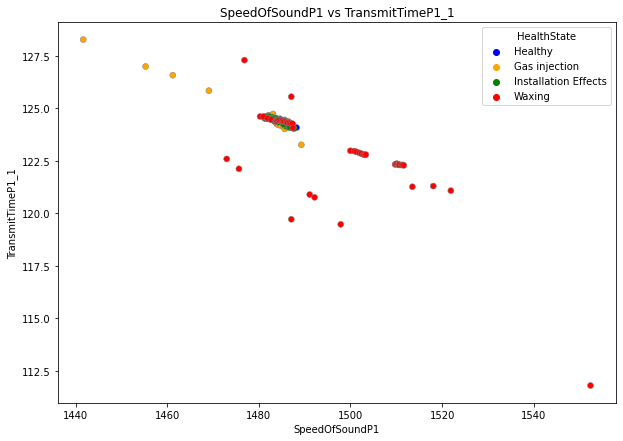

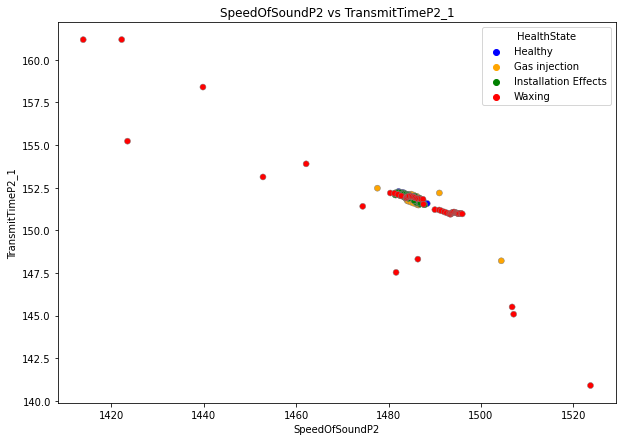

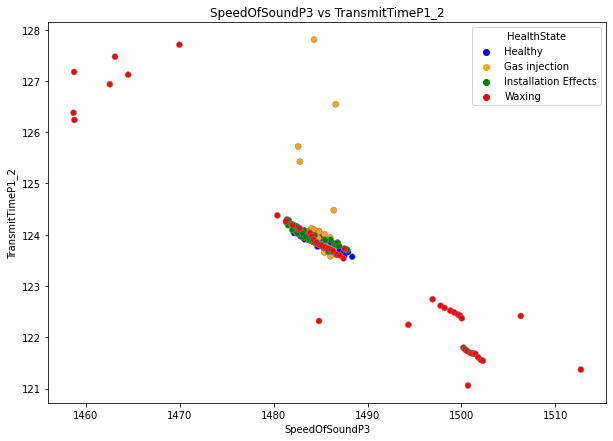

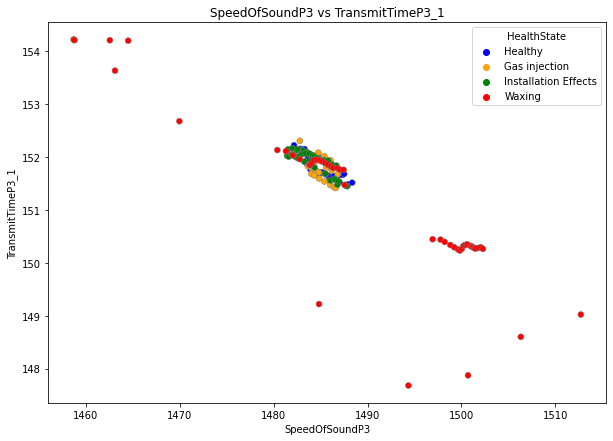

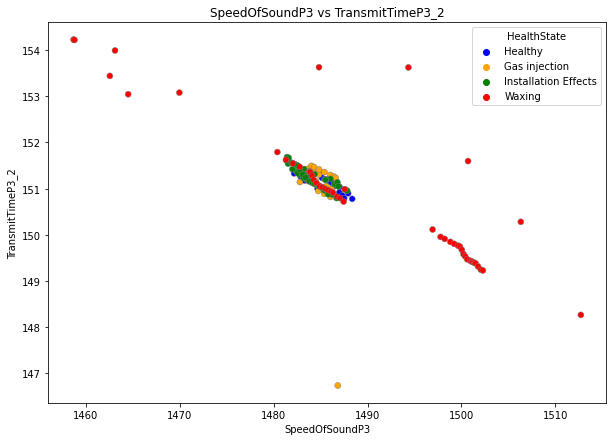

In [78]:
plotScatter('SpeedOfSoundP1','TransmitTimeP1_1', df_D)
plotScatter('SpeedOfSoundP2','TransmitTimeP2_1', df_D)
plotScatter('SpeedOfSoundP3','TransmitTimeP1_2', df_D)
plotScatter('SpeedOfSoundP3','TransmitTimeP3_1', df_D)
plotScatter('SpeedOfSoundP3','TransmitTimeP3_2', df_D)

plotScatter('SpeedOfSoundP4','SignalStrP4_1', df_D) #-0.84
plotScatter('SpeedOfSoundP4','SignalStrP4_2', df_D) #-0.84
plotScatter('SpeedOfSoundP4','SignalQltP4_1', df_D) #-0.86
plotScatter('SpeedOfSoundP4','SignalQltP4_2', df_D) #-0.86
plotScatter('SpeedOfSoundP4','TransmitTimeP4_1', df_D) #-0.86
plotScatter('SpeedOfSoundP4','TransmitTimeP4_2', df_D) #-0.93

plotScatter('SignalStrP1_1','GainP1_1', df_D) #-0.89
plotScatter('SignalStrP1_1','GainP1_2', df_D) #-0.89
plotScatter('SignalStrP1_1','GainP2_1', df_D) #-0.89
plotScatter('SignalStrP1_1','GainP2_2', df_D) #-0.88
plotScatter('SignalStrP1_1','GainP3_1', df_D) #-0.94
plotScatter('SignalStrP1_1','GainP3_2', df_D) #-0.94

plotScatter('SignalStrP1_2','GainP1_1', df_D) #-0.9
plotScatter('SignalStrP1_2','GainP1_2', df_D) #-0.9
plotScatter('SignalStrP1_2','GainP2_1', df_D) #-0.89
plotScatter('SignalStrP1_2','GainP2_2', df_D) #-0.89
plotScatter('SignalStrP1_2','GainP3_1', df_D) #-0.95
plotScatter('SignalStrP1_2','GainP3_2', df_D) #-0.95

plotScatter('SignalStrP2_1','GainP1_1', df_D) #-0.9
plotScatter('SignalStrP2_1','GainP1_2', df_D) #-0.9
plotScatter('SignalStrP2_1','GainP2_1', df_D) #-0.95
plotScatter('SignalStrP2_1','GainP2_2', df_D) #-0.95
plotScatter('SignalStrP2_1','GainP3_1', df_D) #-0.92
plotScatter('SignalStrP2_1','GainP3_2', df_D) #-0.92

plotScatter('SignalStrP2_2','GainP1_1', df_D) #-0.89
plotScatter('SignalStrP2_2','GainP1_2', df_D) #-0.89
plotScatter('SignalStrP2_2','GainP2_1', df_D) #-0.94
plotScatter('SignalStrP2_2','GainP2_2', df_D) #-0.94
plotScatter('SignalStrP2_2','GainP3_1', df_D) #-0.91
plotScatter('SignalStrP2_2','GainP3_2', df_D) #-0.91

plotScatter('SignalStrP3_1','GainP1_1', df_D) #-0.88
plotScatter('SignalStrP3_1','GainP1_2', df_D) #-0.88
plotScatter('SignalStrP3_1','GainP2_1', df_D) #-0.84
plotScatter('SignalStrP3_1','GainP2_2', df_D) #-0.84
plotScatter('SignalStrP3_1','GainP3_1', df_D) #-0.94
plotScatter('SignalStrP3_1','GainP3_2', df_D) #-0.94

plotScatter('SignalStrP3_2','GainP1_1', df_D) #-0.88
plotScatter('SignalStrP3_2','GainP1_2', df_D) #-0.88
plotScatter('SignalStrP3_2','GainP2_1', df_D) #-0.85
plotScatter('SignalStrP3_2','GainP2_2', df_D) #-0.85
plotScatter('SignalStrP3_2','GainP3_1', df_D) #-0.94
plotScatter('SignalStrP3_2','GainP3_2', df_D) #-0.94

plotScatter('SignalStrP4_1','SpeedOfSoundP4', df_D) #-0.84
plotScatter('SignalStrP4_1','GainP4_1', df_D) #-0.97
plotScatter('SignalStrP4_1','GainP4_2', df_D) #-0.97

plotScatter('SignalStrP4_2','SpeedOfSoundP4', df_D) #-0.84
plotScatter('SignalStrP4_2','GainP4_1', df_D) #-0.98
plotScatter('SignalStrP4_2','GainP4_2', df_D) #-0.98

plotScatter('SignalQltP1_1','GainP1_1', df_D) #-0.82
plotScatter('SignalQltP1_1','GainP1_2', df_D) #-0.82
plotScatter('SignalQltP1_1','GainP2_1', df_D) #-0.88
plotScatter('SignalQltP1_1','GainP2_2', df_D) #-0.88
plotScatter('SignalQltP1_1','GainP3_1', df_D) #-0.8
plotScatter('SignalQltP1_1','GainP3_2', df_D) #-0.8

plotScatter('SignalQltP1_2','GainP1_1', df_D) #-0.77
plotScatter('SignalQltP1_2','GainP1_2', df_D) #-0.77
plotScatter('SignalQltP1_2','GainP2_1', df_D) #-0.83
plotScatter('SignalQltP1_2','GainP2_2', df_D) #-0.83
plotScatter('SignalQltP1_2','GainP3_1', df_D) #-0.77
plotScatter('SignalQltP1_2','GainP3_2', df_D) #-0.77

plotScatter('SignalQltP2_2','TransmitTimeP2_2', df_D) #-0.83






### __2.X. Detecting Outliers__

In [22]:
# group by columns
firstCol = df_D.columns[0:3].to_list()
flowVelocity = df_D.columns[3:7].to_list()
speedOfSound = df_D.columns[7:11].to_list()
signalStr = df_D.columns[11:19].to_list()
signalQlt = df_D.columns[19:27].to_list()
gain = df_D.columns[27:35].to_list()
transmitTime = df_D.columns[35:43].to_list()

In [23]:
# list of all attributes in groups
attri_D = []
attri_D.extend([firstCol, flowVelocity, speedOfSound, signalStr, signalQlt, gain, transmitTime])

# # grouped dataframe
# df_D_map_grp = []
# for col in attri_D:
#     # df_D_map_grp.append(df_D_map[col])
#     df_D_map_grp.append(pd.concat([df_D[col], Y_map], axis=1))

In [24]:
def plotBoxplot(attriList, df):
    for col in attriList:
        plt.figure(figsize = (15, 8))
        # sns.boxplot(x="variable", y="value", data=pd.melt(df[attri])) # vertical
        sns.boxplot(data=df[col], orient="h") # horizontal version 
        # sns.boxplot(x="variable", y="value", data=pd.melt(X[attri])).set(xlabel='FICO Score', ylabel='Interest Rate') #vertical with label
        plt.show()

    for col in attriList:
        plt.figure(figsize = (15, 8))
        sns.boxplot(x="variable", y="value",hue='HealthState', data=pd.melt(pd.concat([df.loc[:,col],df.loc[:,'HealthState']], axis=1), id_vars=['HealthState']))
        plt.show()

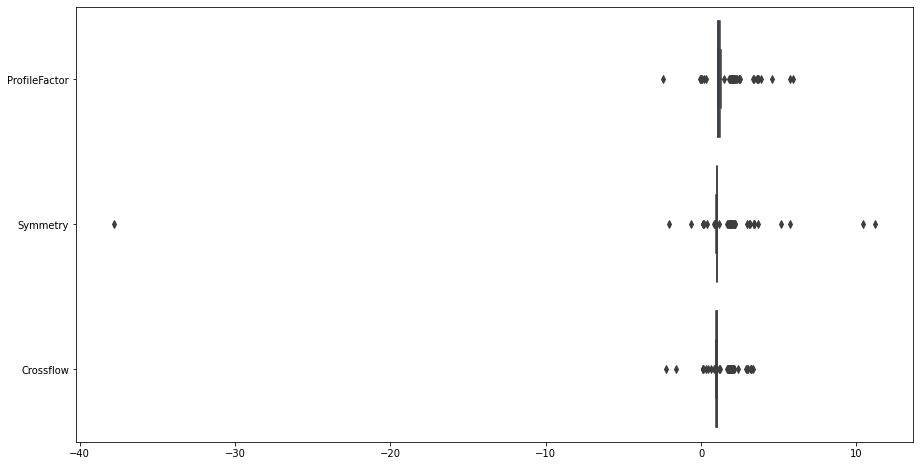

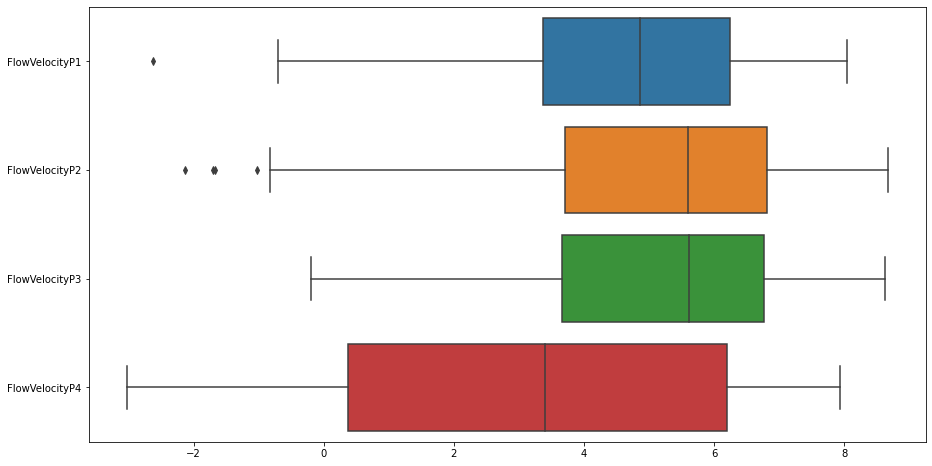

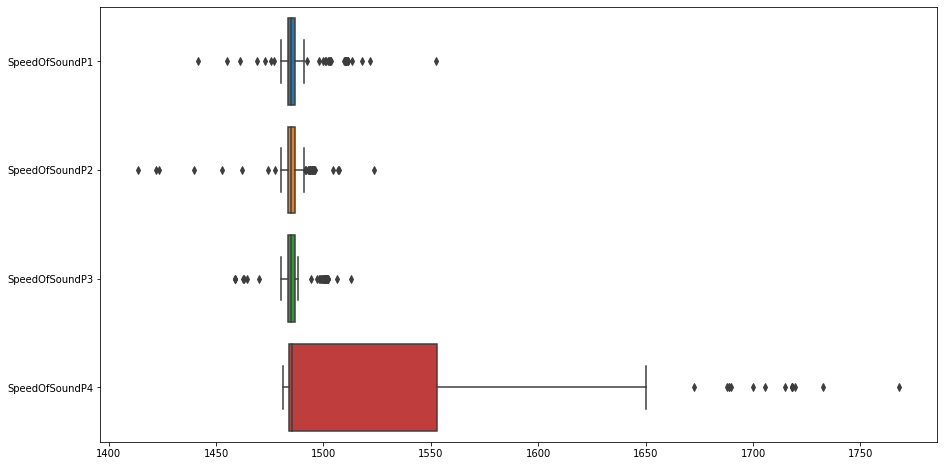

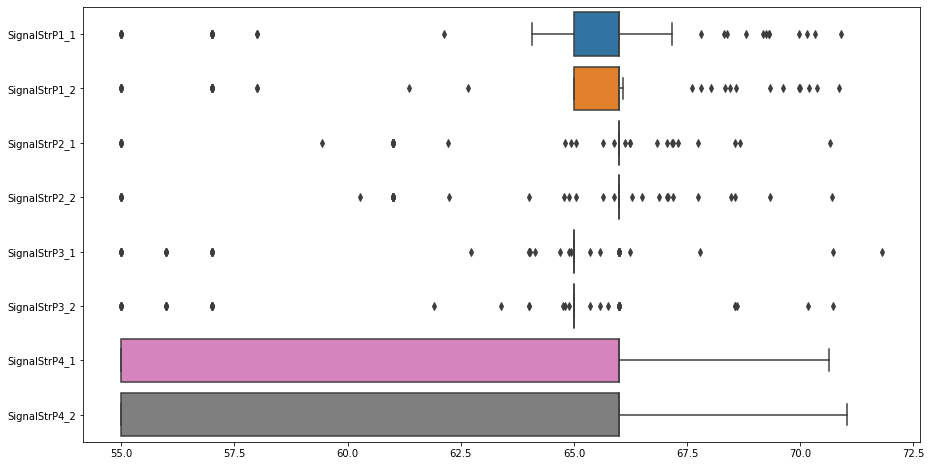

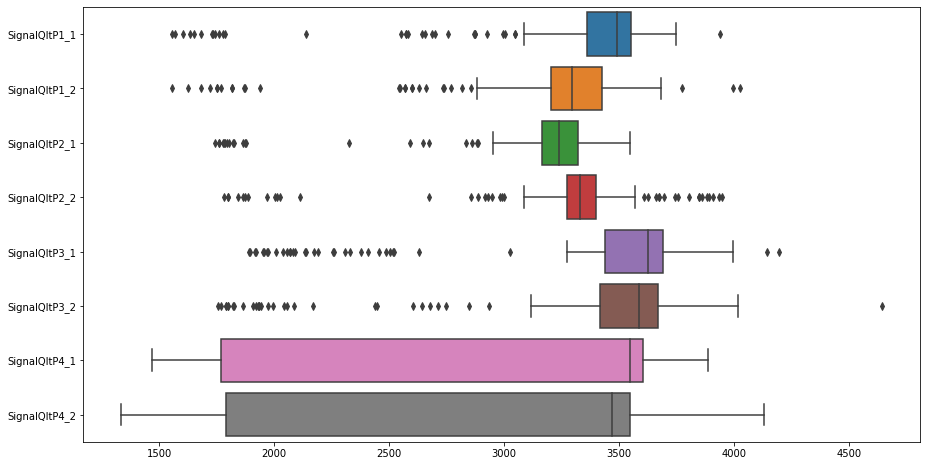

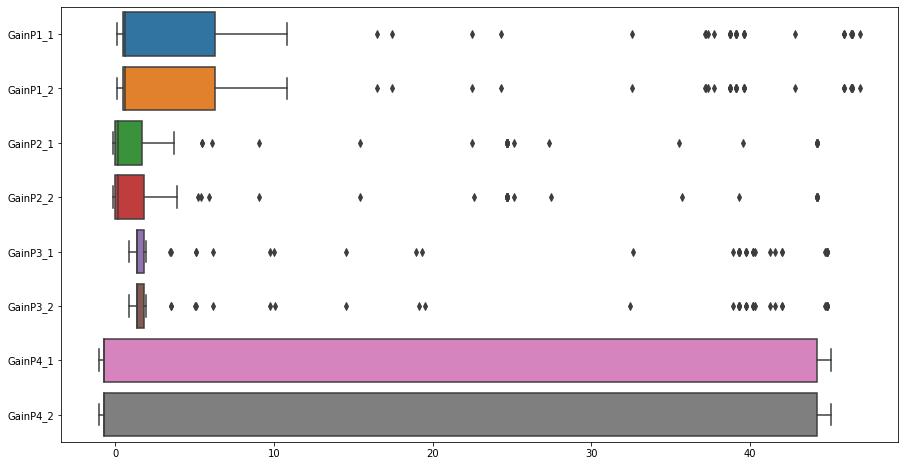

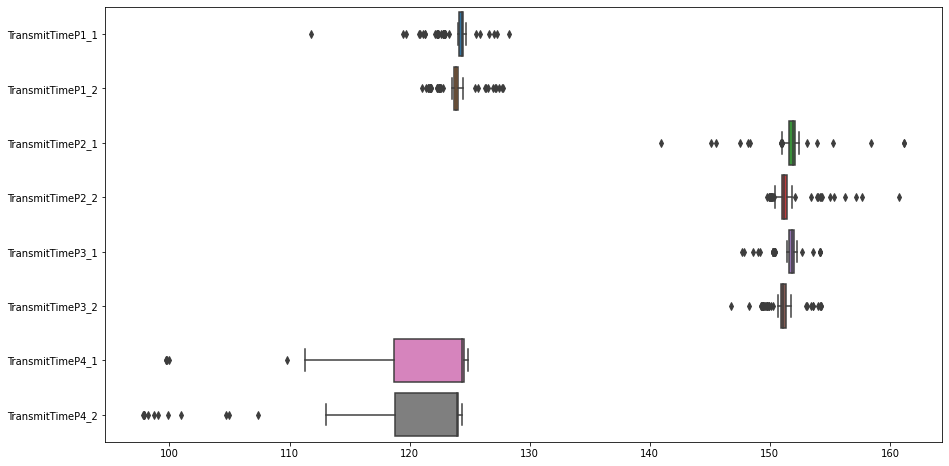

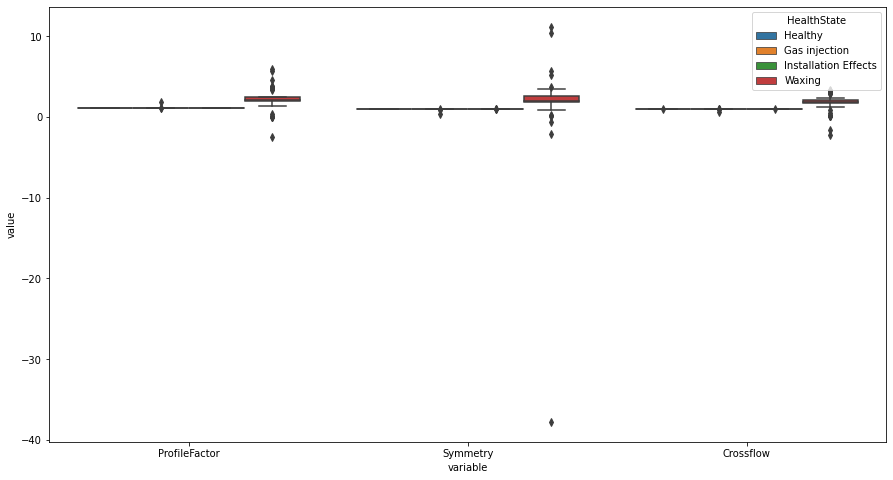

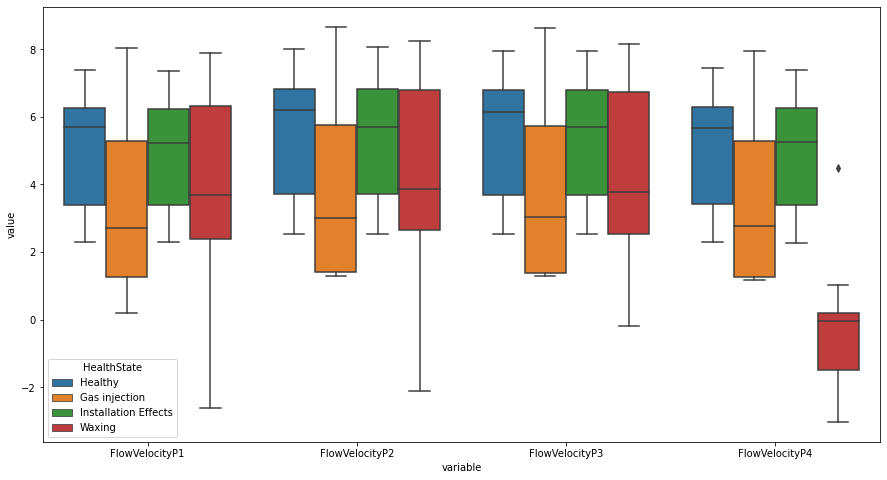

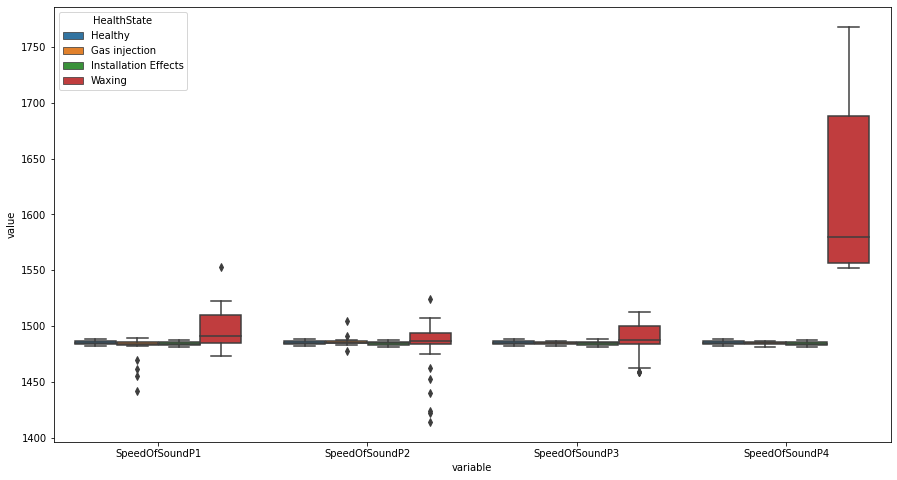

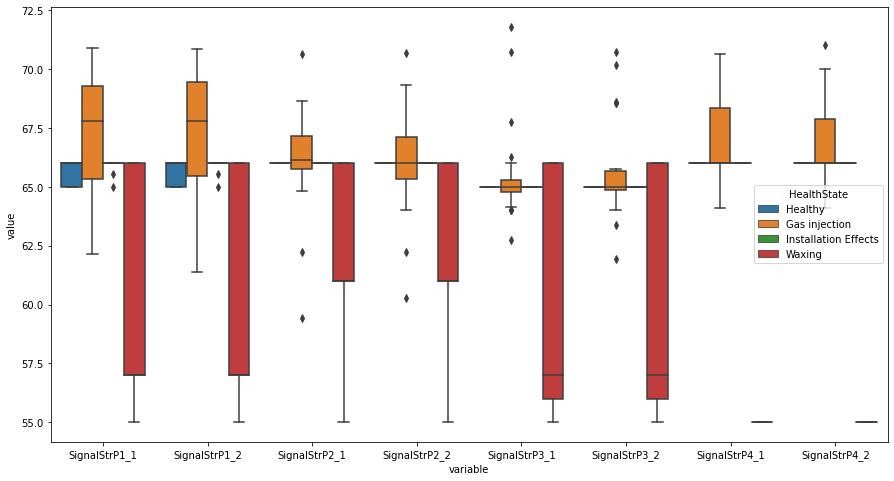

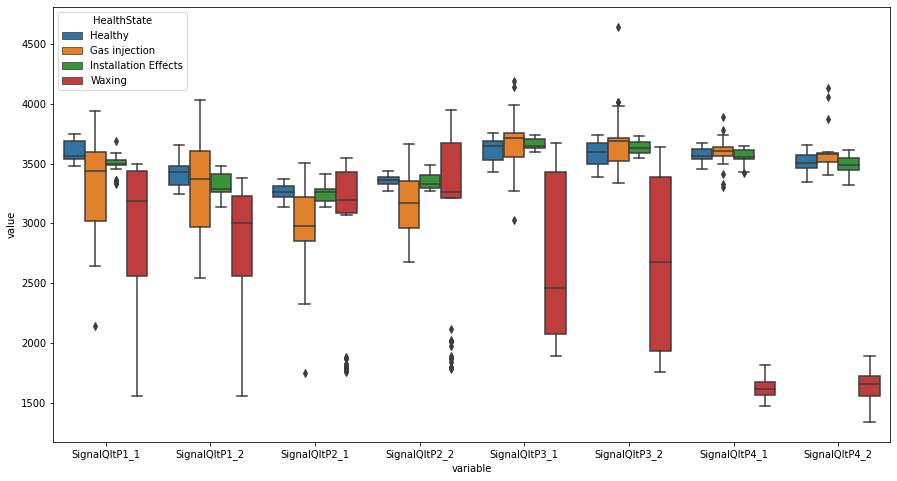

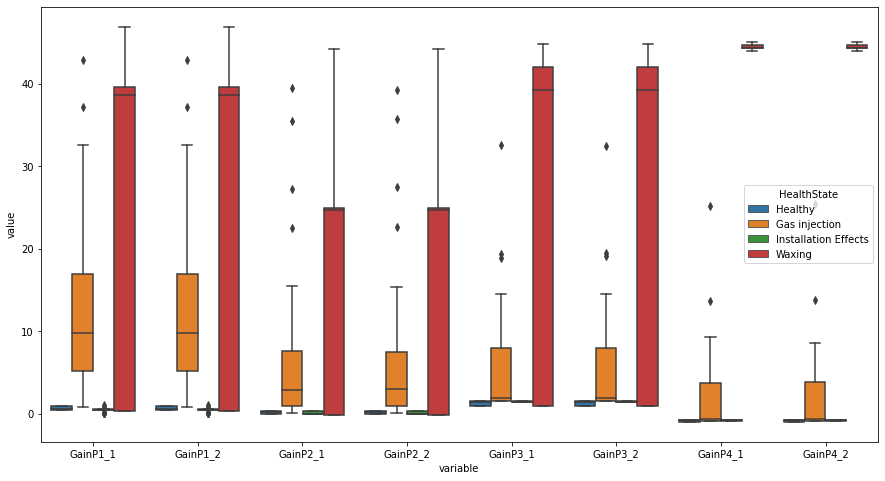

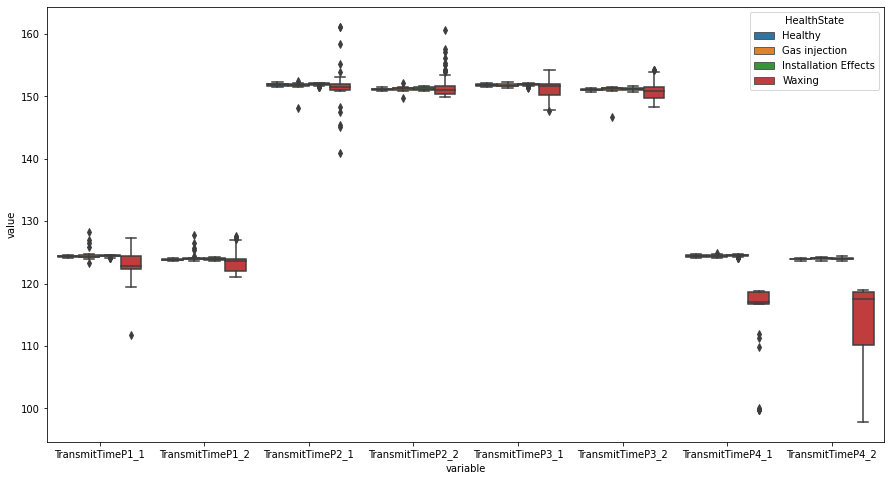

In [25]:
plotBoxplot(attri_D, df_D_map)

### __2.X. Remove Outliers__

In [26]:
def removeOutliersIQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

    filtered = ~((df < lower_bound) | (df > upper_bound)).any(axis=1)
    clean_df = df[filtered]

    return clean_df

def removeOutliersIQRByGroup(df):
    clean_df_list = []
    classGrp = df.groupby('HealthState')

    for index in range(1, len(classGrp)+1):
        clean_df = removeOutliersIQR(classGrp.get_group(index))
        clean_df_list.append(clean_df)
    
    return pd.concat(clean_df_list)

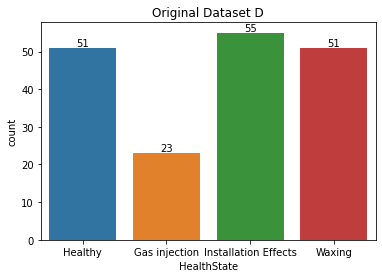

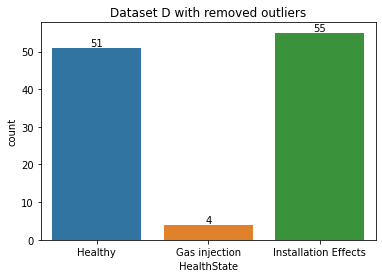

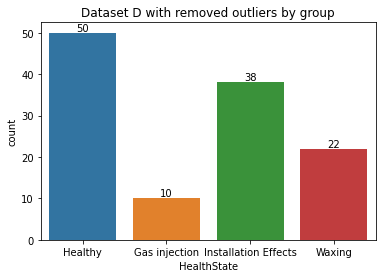

In [27]:
plotTargetCount(Y_map, "Original Dataset D")

df_D_clean_single = removeOutliersIQR(df_D)
plotTargetCount(df_D_clean_single['HealthState'].map(label), "Dataset D with removed outliers")

df_D_clean = removeOutliersIQRByGroup(df_D)
plotTargetCount(df_D_clean['HealthState'].map(label), "Dataset D with removed outliers by group")

df_D_clean_X = df_D_clean.drop('HealthState', axis=1)
df_D_clean_Y = df_D_clean['HealthState']
df_D_clean_Y_map = df_D_clean['HealthState'].map(label)

Observation:
Notice that if we were to remove by IQR for entire dataset, it will remove entire Waxing target class

TODO: probably plot boxplot again?

## __3. Principal Component Analysis (PCA)__

### __3.X. Visualization of Explained Variance and Principal Component__

In [28]:
def plotPCA(df_X, label="Plot of eigen variance energy captured by Principle component"):
    # do feature scaling
    sc = StandardScaler()
    X_scaled = sc.fit_transform(df_X)

    # do PCA
    pca_all = PCA()
    pca_all.fit(X_scaled)

    var_exp = pca_all.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print("var_exp: ", var_exp)
    print("cum_var_exp: ", cum_var_exp)
    
    # 6, 4 is default size plt.rcParams.get('figure.figsize')
    plt.figure(figsize=(12.0, 4.0))
    plt.subplot(1, 2, 1)
    plt.bar(range(1,pca_all.n_components_+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1,pca_all.n_components_+1), cum_var_exp, where='mid', label='cumulative explained variance', color='red')
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio') #eigen_variance_energy_ratio
    plt.suptitle(label)
    # plt.title("Plot of eigen variance energy captured by Principle component")
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(np.cumsum(pca_all.explained_variance_ratio_), color='red')
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    # plt.title("number of components")

    plt.show()

var_exp:  [5.13889868e-01 1.80024968e-01 7.15438981e-02 5.44703595e-02
 4.47590730e-02 3.98206960e-02 1.78573835e-02 1.69645642e-02
 1.40564091e-02 9.81892215e-03 7.27788242e-03 6.08024836e-03
 5.26181812e-03 4.41340350e-03 3.42508707e-03 1.99116646e-03
 1.89346186e-03 1.42560128e-03 1.00763671e-03 8.27204406e-04
 7.29364803e-04 6.64656963e-04 4.56469993e-04 3.78053406e-04
 2.62431460e-04 1.91639178e-04 1.52113043e-04 1.14953866e-04
 6.31734612e-05 5.30661365e-05 3.46652952e-05 2.80939312e-05
 2.31735746e-05 1.40289491e-05 7.64746157e-06 6.11792050e-06
 4.80615910e-06 3.61450936e-06 2.24041345e-06 2.27156091e-08
 1.37269316e-08 8.75111583e-10 2.78130407e-33]
cum_var_exp:  [0.51388987 0.69391484 0.76545873 0.81992909 0.86468817 0.90450886
 0.92236625 0.93933081 0.95338722 0.96320614 0.97048402 0.97656427
 0.98182609 0.98623949 0.98966458 0.99165575 0.99354921 0.99497481
 0.99598245 0.99680965 0.99753902 0.99820367 0.99866014 0.9990382
 0.99930063 0.99949227 0.99964438 0.99975933 0.99982

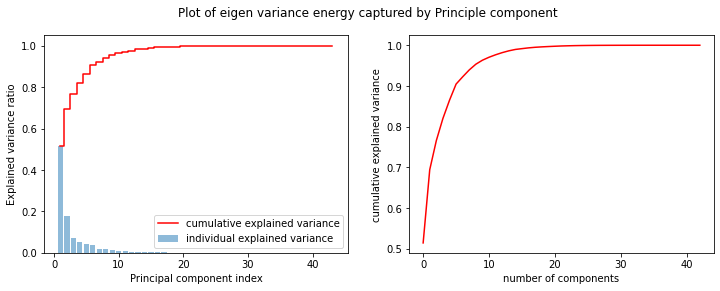

In [29]:
plotPCA(X)

Observation:
9 PC Components is suffice to represent about 95% variance of the data.

var_exp:  [5.65955292e-01 2.17995640e-01 1.02872404e-01 4.73759614e-02
 2.82030221e-02 1.40204141e-02 7.80710676e-03 5.60238240e-03
 3.01351503e-03 2.23985619e-03 1.28562503e-03 9.19135519e-04
 8.29546306e-04 6.77581266e-04 4.95725071e-04 2.61990022e-04
 1.71596215e-04 8.31146017e-05 5.21350619e-05 4.12256678e-05
 2.81028757e-05 2.25995399e-05 1.27159418e-05 1.07101878e-05
 7.35658952e-06 5.58854326e-06 3.37549582e-06 2.03306279e-06
 1.16013901e-06 9.24455574e-07 6.12536743e-07 5.60096349e-07
 3.50762170e-07 2.53042429e-07 1.60061317e-07 1.31488029e-07
 7.31612772e-08 2.02820313e-08 2.49285161e-09 1.72332388e-12
 3.20886673e-33 3.20886673e-33 3.20886673e-33]
cum_var_exp:  [0.56595529 0.78395093 0.88682334 0.9341993  0.96240232 0.97642273
 0.98422984 0.98983222 0.99284574 0.99508559 0.99637122 0.99729036
 0.9981199  0.99879748 0.99929321 0.9995552  0.99972679 0.99980991
 0.99986204 0.99990327 0.99993137 0.99995397 0.99996669 0.9999774
 0.99998475 0.99999034 0.99999372 0.99999575 0.99999

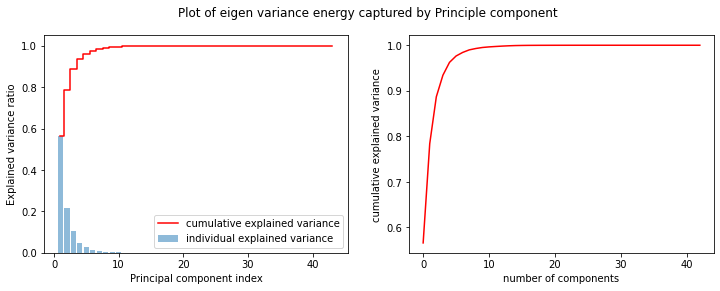

In [30]:
plotPCA(df_D_clean_X)

Observation:
5 PC Components is suffice to represent about 95% variance of the data.

### __3.X. Compute and apply PCA with Principal Component=2__

In [31]:
def scale_pca(df_X, n_components=2):
    pipeline = Pipeline([('scalar', StandardScaler()),
                        ('pca', PCA(n_components=n_components))])
    X_scale_pca = pd.DataFrame(pipeline.fit_transform(df_X), columns=[f"PC{i}" for i in range(1,n_components+1)])
    return X_scale_pca

In [32]:
X_scale_pca_2 = scale_pca(X, 2)
X_clean_scale_pca_2 = scale_pca(df_D_clean_X, 2)

### __3.X. Visualizing Data in 2 Dimension Scatter Plot__

In [33]:
def plotPCA2(df_scale_pca_2_X, df_Y, label="Projection of Data in Eigenspace"):
    df_scale_pca_2_X_num = df_scale_pca_2_X.to_numpy()

    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df_scale_pca_2_X_num[:,0], y=df_scale_pca_2_X_num[:,1], s=70, hue=df_Y, palette=['blue', 'orange', 'green', 'red'])
    plt.title(label)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

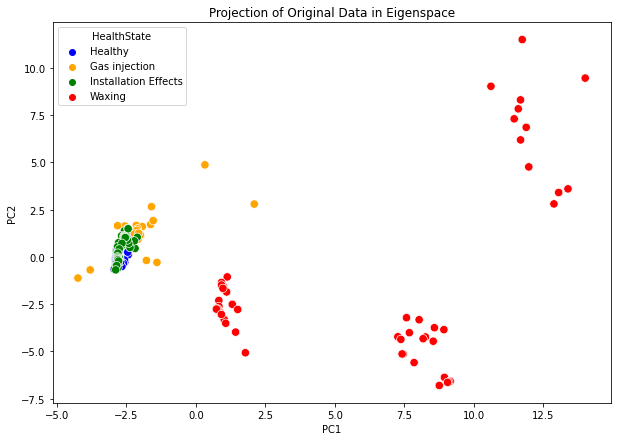

In [34]:
plotPCA2(X_scale_pca_2, Y_map, "Projection of Original Data in Eigenspace")

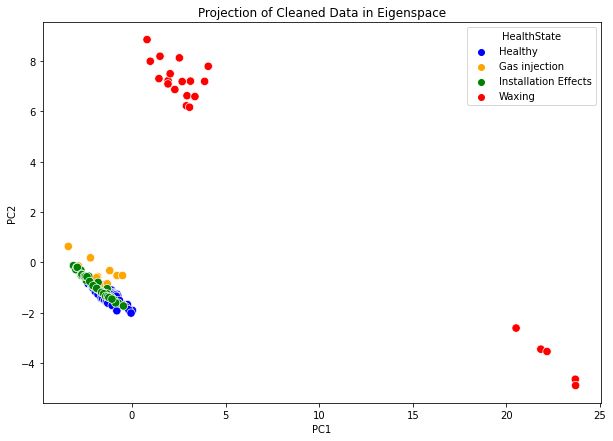

In [35]:
plotPCA2(X_clean_scale_pca_2, df_D_clean_Y_map, "Projection of Cleaned Data in Eigenspace")

### __3.X. Compute and apply PCA with Principal Component=3__

In [36]:
X_scale_pca_3 = scale_pca(X, 3)

X_clean_scale_pca_3 = scale_pca(df_D_clean_X, 3)

### __3.X. Visualizing Data in 3 Dimension Scatter Plot__

In [37]:
def plotPCA3(df_scale_pca_3_X, df_Y, value=0):
    df_scale_pca_3_X_num = df_scale_pca_3_X.to_numpy()

    fig = plt.figure(figsize = (12,8))
    ax = plt.axes(projection='3d')

    sctt = ax.scatter3D(df_scale_pca_3_X_num[:,0], df_scale_pca_3_X_num[:,1], df_scale_pca_3_X_num[:,2],
                    c=df_Y, s=50, alpha=0.6)
    
    plt.title(f"3D Scatterplot: {value}% of variability captured", pad=15)
    plt.legend(*sctt.legend_elements(), loc="best")

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    plt.show()

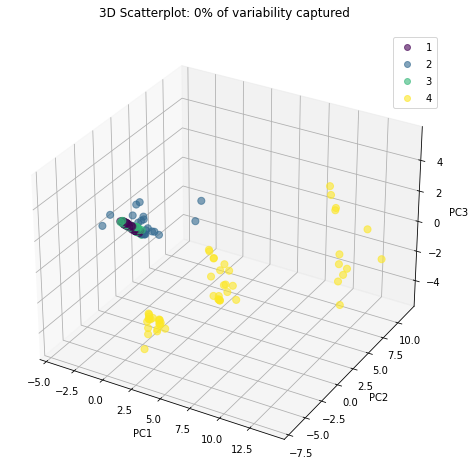

In [38]:
plotPCA3(X_scale_pca_3, Y)

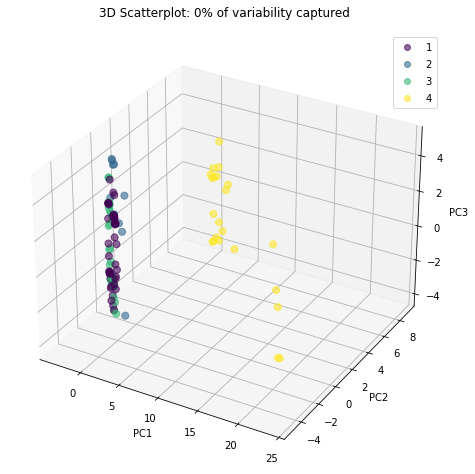

In [39]:
plotPCA3(X_clean_scale_pca_3, df_D_clean_Y)

### __3.X. Feature Importance__

## __4. Prepare dataset__

### __4.X. Split Data into Training and Test set (80:20/70:30)__

In [40]:
def scale_pca_model(X_train, X_test, n_component):
    # apply standaization to both training and test daset but separately (THIS IS IMPORTANT)
    sc = StandardScaler()

    #  fit on training set only and apply transformation to both the training set and the test set
    X_scale_train = sc.fit_transform(X_train)
    X_scale_test = sc.transform(X_test)

    # apply PCA
    pca = PCA(n_components=n_component)
    X_train_pca = pca.fit_transform(X_scale_train)
    X_test_pca = pca.transform(X_scale_test)

    # change into panda dataframe
    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f"PC{i}" for i in range(1,pca.n_components+1)])
    X_test_pca = pd.DataFrame(data=X_test_pca, columns=[f"PC{i}" for i in range(1,pca.n_components+1)])

    return X_train_pca, X_test_pca

random_state = 0

#### __4.X. Original dataset__

In [41]:
X_og_train, X_og_test, Y_og_train, Y_og_test = train_test_split(X, Y, random_state=random_state, test_size=0.2)
X_og_train_2, X_og_test_2, Y_og_train_2, Y_og_test_2 = train_test_split(X, Y, random_state=random_state, test_size=0.3)

X_clean_og_train, X_clean_og_test, Y_clean_og_train, Y_clean_og_test = train_test_split(df_D_clean_X, df_D_clean_Y, random_state=random_state, test_size=0.2)
X_clean_og_train_2, X_clean_og_test_2, Y_clean_og_train_2, Y_clean_og_test_2 = train_test_split(df_D_clean_X, df_D_clean_Y, random_state=random_state, test_size=0.3)

#### __4.X. Original dataset with PCA__

In [42]:
# original dataset

# split dataset 80:20 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=random_state, test_size=0.2)

# 80:20 dataset with PCA component=9
X_train_pca, X_test_pca = scale_pca_model(X_train, X_test, 9)

# dataset prepared
# X_train_pca, X_test_pca, Y_train, Y_test

In [43]:
# split dataset 70:30
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, random_state=random_state, test_size=0.3)

# 70:30 dataset with PCA component=9
X_train_pca_2, X_test_pca_2 = scale_pca_model(X_train_2, X_test_2, 9)

# dataset prepared
# X_train_pca_2, X_test_pca_2, Y_train_2, Y_test_2

#### __4.X. Cleaned dataset with PCA__

In [44]:
# cleaned dataset

# split dataset 80:20 
X_clean_train, X_clean_test, Y_clean_train, Y_clean_test = train_test_split(df_D_clean_X, df_D_clean_Y, random_state=random_state, test_size=0.2)

# 80:20 dataset with PCA component=5
X_clean_train_pca, X_clean_test_pca = scale_pca_model(X_clean_train, X_clean_test, 5)

# dataset prepared
# X_clean_train_pca, X_clean_test_pca, Y_clean_train, Y_clean_test

In [45]:
# split dataset 70:30
X_clean_train_2, X_clean_test_2, Y_clean_train_2, Y_clean_test_2 = train_test_split(df_D_clean_X, df_D_clean_Y, random_state=random_state, test_size=0.3)

# 70:30 dataset with PCA component=5
X_clean_train_pca_2, X_clean_test_pca_2 = scale_pca_model(X_clean_train_2, X_clean_test_2, 5)

# dataset prepared
# X_clean_train_pca_2, X_clean_test_pca_2, Y_clean_train_2, Y_clean_test_2

## __5. Predictive Model__

In [46]:
def plotAccuracyGraph(xValue, trainAcc, testAcc, xLabel, title, xScale=''):
    plt.plot(xValue, trainAcc, 'ro-', xValue, testAcc,'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel(xLabel)
    plt.ylabel('Accuracy')
    if xScale != '':
        plt.xscale('log')
    plt.title(title)
    
    plt.show()

def plotConfusionMatrix(Y_test, Y_pred):
    Y_test_pd = pd.DataFrame(Y_test.to_list(), columns=['Y_Actual'])
    Y_pred_pd = pd.DataFrame(Y_pred, columns=['Y_Predicted'])
    df = pd.DataFrame(pd.concat([Y_test_pd,Y_pred_pd], axis=1))
    confusion_matrix = pd.crosstab(df['Y_Actual'], df['Y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)
    plt.show()


In [47]:
# dataset_og = [[X_og_train, X_og_test, Y_og_train, Y_og_test],
#            [X_og_train_2, X_og_test_2, Y_og_train_2, Y_og_test_2],
#            [X_clean_og_train, X_clean_og_test, Y_clean_og_train, Y_clean_og_test],
#            [X_clean_og_train_2, X_clean_og_test_2, Y_clean_og_train_2, Y_clean_og_test_2]
#            ]

# dataset = [[X_train_pca, X_test_pca, Y_train, Y_test],
#            [X_train_pca_2, X_test_pca_2, Y_train_2, Y_test_2],
#            [X_clean_train_pca, X_clean_test_pca, Y_clean_train, Y_clean_test],
#            [X_clean_train_pca_2, X_clean_test_pca_2, Y_clean_train_2, Y_clean_test_2]
#            ]

title_og = ["Original Dataset (80:20)",
            "Original Dataset (70:30)",
            "Cleaned Dataset (80:20)",
            "Cleaned Dataset (70:30)"]

title = ["Original Dataset with PCA (80:20)",
         "Original Dataset with PCA (70:30)",
         "Cleaned Dataset with PCA (80:20)",
         "Cleaned Dataset with PCA (70:30)"]

### __5.X. KNN__

In [48]:
def useKNN(X_train, X_test, Y_train, Y_test, numNeighbors=30):
    trainAcc = []
    testAcc = []

    for k in range(1,numNeighbors):
        clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        clf.fit(X_train, Y_train)
        
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)

        trainAcc.append(accuracy_score(Y_train, Y_predTrain))
        testAcc.append(accuracy_score(Y_test, Y_predTest))

        # plotConfusionMatrix(Y_test, Y_predTest)
    
    return trainAcc, testAcc

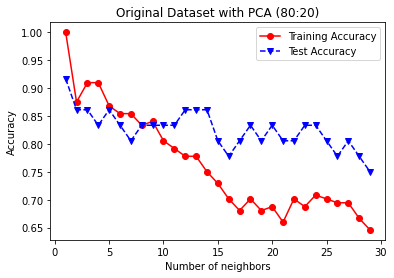

In [49]:
trainAcc, testAcc = useKNN(X_train_pca, X_test_pca, Y_train, Y_test)
plotAccuracyGraph(xValue=range(1,30), trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of neighbors', title=title[0])


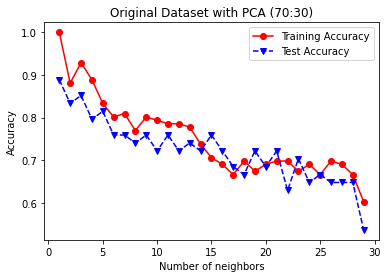

In [50]:
trainAcc, testAcc = useKNN(X_train_pca_2, X_test_pca_2, Y_train_2, Y_test_2)
plotAccuracyGraph(xValue=range(1,30), trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of neighbors', title=title[1])

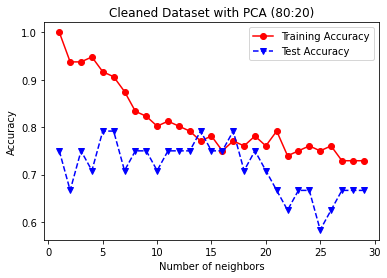

In [51]:
trainAcc, testAcc = useKNN(X_clean_train_pca, X_clean_test_pca, Y_clean_train, Y_clean_test)
plotAccuracyGraph(xValue=range(1,30), trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of neighbors', title=title[2])

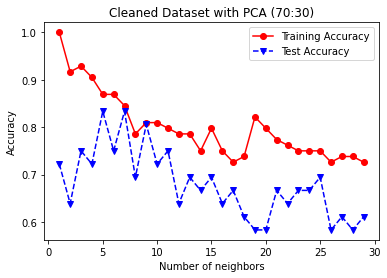

In [52]:
trainAcc, testAcc = useKNN(X_clean_train_pca_2, X_clean_test_pca_2, Y_clean_train_2, Y_clean_test_2)
plotAccuracyGraph(xValue=range(1,30), trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of neighbors', title=title[3])

### __5.X. Naive Bayes__

In [53]:
def useGaussianNaiveBayes(X_train, X_test, Y_train, Y_test):
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    trainAcc = accuracy_score(Y_train, Y_predTrain)
    testAcc = accuracy_score(Y_test, Y_predTest)

    return trainAcc, testAcc

In [54]:
trainAcc, testAcc = useGaussianNaiveBayes(X_og_train, X_og_test, Y_og_train, Y_og_test)
print(f"{title_og[0]}: Train accuracy: {trainAcc}, Test accuracy: {testAcc}")

Original Dataset (80:20): Train accuracy: 0.8611111111111112, Test accuracy: 0.8888888888888888


In [55]:
trainAcc, testAcc = useGaussianNaiveBayes(X_og_train_2, X_og_test_2, Y_og_train_2, Y_og_test_2 )
print(f"{title_og[1]}: Train accuracy: {trainAcc}, Test accuracy: {testAcc}")

Original Dataset (70:30): Train accuracy: 0.8492063492063492, Test accuracy: 0.9074074074074074


In [56]:
trainAcc, testAcc = useGaussianNaiveBayes(X_clean_og_train, X_clean_og_test, Y_clean_og_train, Y_clean_og_test)
print(f"{title_og[2]}: Train accuracy: {trainAcc}, Test accuracy: {testAcc}")

Cleaned Dataset (80:20): Train accuracy: 0.8958333333333334, Test accuracy: 0.9166666666666666


In [57]:
trainAcc, testAcc = useGaussianNaiveBayes(X_clean_og_train_2, X_clean_og_test_2, Y_clean_og_train_2, Y_clean_og_test_2)
print(f"{title_og[3]}: Train accuracy: {trainAcc}, Test accuracy: {testAcc}")

Cleaned Dataset (70:30): Train accuracy: 0.9285714285714286, Test accuracy: 0.8888888888888888


### __5.X. Decision Tree__

In [58]:
maxDepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50] 

def useDecisionTree(X_train, X_test, Y_train, Y_test):

    trainAcc = np.zeros(len(maxDepths))
    testAcc = np.zeros(len(maxDepths))
   
    index = 0
    for depth in maxDepths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf = clf.fit(X_train, Y_train)

        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        
        trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
        testAcc[index] = accuracy_score(Y_test, Y_predTest)
        index += 1
        
    return trainAcc, testAcc

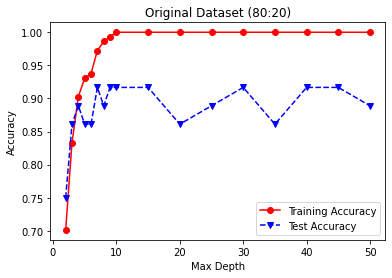

In [59]:
trainAcc, testAcc = useDecisionTree(X_og_train, X_og_test, Y_og_train, Y_og_test)
plotAccuracyGraph(xValue=maxDepths, trainAcc=trainAcc, testAcc=testAcc, xLabel='Max Depth', title=title_og[0])

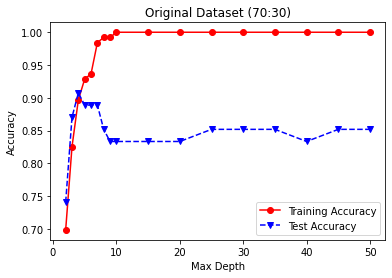

In [60]:
trainAcc, testAcc = useDecisionTree(X_og_train_2, X_og_test_2, Y_og_train_2, Y_og_test_2)
plotAccuracyGraph(xValue=maxDepths, trainAcc=trainAcc, testAcc=testAcc, xLabel='Max Depth', title=title_og[1])

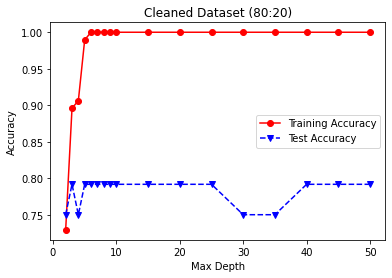

In [61]:
trainAcc, testAcc = useDecisionTree(X_clean_og_train, X_clean_og_test, Y_clean_og_train, Y_clean_og_test)
plotAccuracyGraph(xValue=maxDepths, trainAcc=trainAcc, testAcc=testAcc, xLabel='Max Depth', title=title_og[2])

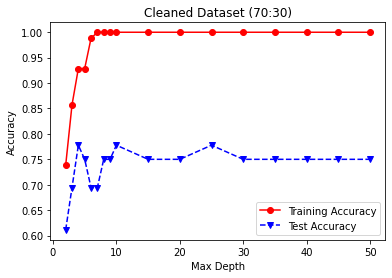

In [62]:
trainAcc, testAcc = useDecisionTree(X_clean_og_train_2, X_clean_og_test_2, Y_clean_og_train_2, Y_clean_og_test_2)
plotAccuracyGraph(xValue=maxDepths, trainAcc=trainAcc, testAcc=testAcc, xLabel='Max Depth', title=title_og[3])

### __5.X. Logistics Regression__

### __5.X. Linear Support Vector Machine(SVM)__

### __5.X. Non-linear Support Vector Machine(SVM)__

In [63]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

def nonLinearSVM(X_train, X_test, Y_train, Y_test):
    trainAcc = []
    testAcc = []

    for param in C:
        clf = SVC(C=param,kernel='rbf',gamma='auto')
        clf.fit(X_train, Y_train)

        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)

        trainAcc.append(accuracy_score(Y_train, Y_predTrain))
        testAcc.append(accuracy_score(Y_test, Y_predTest))

    return trainAcc, testAcc

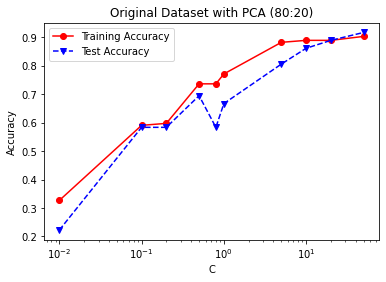

In [64]:
trainAcc, testAcc = nonLinearSVM(X_train_pca, X_test_pca, Y_train, Y_test)
plotAccuracyGraph(xValue=C, trainAcc=trainAcc, testAcc=testAcc, xLabel='C', title=title[0], xScale='log')

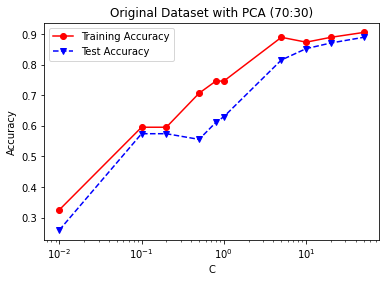

In [65]:
trainAcc, testAcc = nonLinearSVM(X_train_pca_2, X_test_pca_2, Y_train_2, Y_test_2)
plotAccuracyGraph(xValue=C, trainAcc=trainAcc, testAcc=testAcc, xLabel='C', title=title[1], xScale='log')

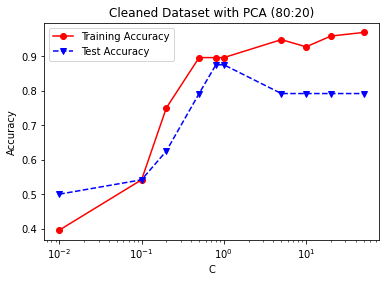

In [66]:
trainAcc, testAcc = nonLinearSVM(X_clean_train_pca, X_clean_test_pca, Y_clean_train, Y_clean_test)
plotAccuracyGraph(xValue=C, trainAcc=trainAcc, testAcc=testAcc, xLabel='C', title=title[2], xScale='log')

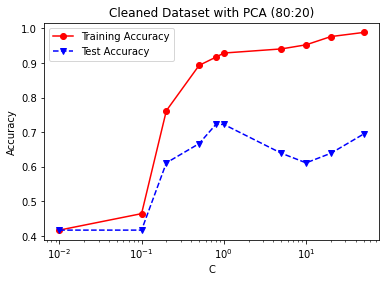

In [67]:
trainAcc, testAcc = nonLinearSVM(X_clean_train_pca_2, X_clean_test_pca_2, Y_clean_train_2, Y_clean_test_2)
plotAccuracyGraph(xValue=C, trainAcc=trainAcc, testAcc=testAcc, xLabel='C', title=title[2], xScale='log')

### __5.X. Neural Network__

In [68]:
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]

def useNN(X_train, X_test, Y_train, Y_test):
    trainAcc = []
    testAcc = []

    for k in hidden_layer_sizes:
        clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=1,max_iter=1000)
        clf.fit(X_train, Y_train)
        
        Y_predTrain = clf.predict(X_train)
        Y_predTest = clf.predict(X_test)
        
        trainAcc.append(accuracy_score(Y_train, Y_predTrain))
        testAcc.append(accuracy_score(Y_test, Y_predTest))
    return trainAcc, testAcc

hidden_layer_size=[x[0] for x in hidden_layer_sizes]

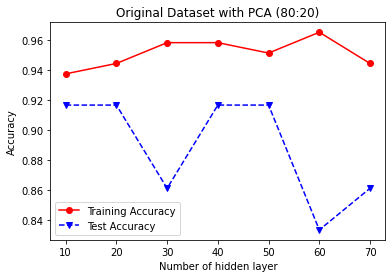

In [69]:
trainAcc, testAcc = useNN(X_train_pca, X_test_pca, Y_train, Y_test)
plotAccuracyGraph(xValue=hidden_layer_size, trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of hidden layer', title=title[0])

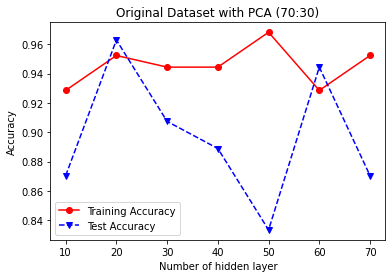

In [70]:
trainAcc, testAcc = useNN(X_train_pca_2, X_test_pca_2, Y_train_2, Y_test_2)
plotAccuracyGraph(xValue=hidden_layer_size, trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of hidden layer', title=title[1])

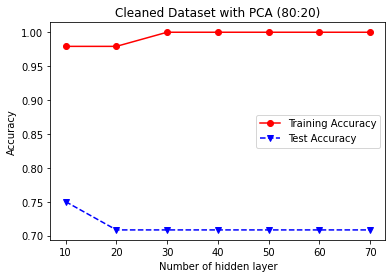

In [71]:
trainAcc, testAcc = useNN(X_clean_train_pca, X_clean_test_pca, Y_clean_train, Y_clean_test)
plotAccuracyGraph(xValue=hidden_layer_size, trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of hidden layer', title=title[2])

C:\Users\ssimp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


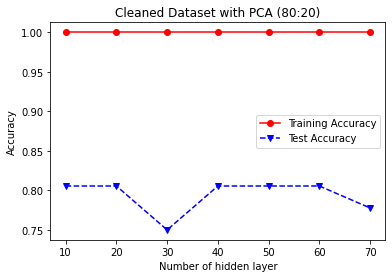

In [72]:
trainAcc, testAcc = useNN(X_clean_train_pca_2, X_clean_test_pca_2, Y_clean_train_2, Y_clean_test_2)
plotAccuracyGraph(xValue=hidden_layer_size, trainAcc=trainAcc, testAcc=testAcc, xLabel='Number of hidden layer', title=title[2])

### __5.X. Plot Decision Boundary using contourf function__

In [73]:
# x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
# y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=5)

# f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10, 8))

# for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0]], [clf1,clf2,clf3,clf4,clf5,clf6,clf7],['KNN(K=30)','NB', 'LR','Linear SVM','nonlinear SVM','Neural Network','Decision Tree(Depth=10)']):

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha=0.4)
#     axarr[idx[0], idx[1]].set_title(tt)
# plt.show()

### __5.X. Visualization of Decision Boundary on various classifiers__

## __X. Conclusion__